

## Creating Machine Learning for Used Cars Business in Saudi Arabia 

### Contents:
 - Business Problem
 - Data Understanding & Preparation
 - Create Model
 - Predict the price 
 - Conclusion
 - Recommendation

## Business Problem

####  Context
The used car market in Saudi Arabia has experienced significant growth since the pandemic, with a projected compound annual growth rate (CAGR) of 9.3% from 2024 to 2030 as reported by 6Wresearch. This trend is attributed to the increasing popularity of online car marketplaces, such as Motory, Carswitch, and Syarah, which have become attractive alternatives for individuals seeking affordable vehicles due to high living costs making new cars less accessible. In response, dealerships are establishing dedicated showrooms to deliver to this growing demand. To better understand and navigate this market, it is best to develop a machine learning model that can accurately predicts used car prices in Saudi Arabia,while also taking into account various factors including market trends, demographics, and online marketplace data.


#### Problem Statement

Predicting the price of used cars within a specific price range can be challenging due to the variability in car conditions, features, and market demand. However, for car seller companies like Syarah.com, it's crucial to prioritize offering a good selection of used cars within this price segment, ensuring they are in good condition and priced competitively.

#### Goal
To predict the market price of used cars that are typically non-negotiable and priced under 300,000 (300k). Additionally, I will identify the features that have the most significant influence on this price range.


#### Analytic Approach
 - Data Understanding and exploration: Start by diving into the data to identify features that might influence car prices and use visualizations like graphs and charts to understand how car prices are distributed and how they relate to other features.

 - Machine learning model selection and evaluation: Choose a machine learning model that aligns well with the business goals.Then assess the model's performance, we'll use metrics like Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and Adjusted R-squared. Ideally, we want to keep MAE and MAPE low, indicating the model's predictions are close to the actual prices.
 
 - Explainable AI with SHAP: Use SHAP (SHapley Additive exPlanations) to analyze which features have the strongest influence on car prices. This will help us understand what factors are most important for our business goals.



#### Metric Evaluation
To evaluate the performance of the regression model, we will use the following metrics:

- Mean Absolute Error (MAE): This tells us, on average, how far off our price predictions are from the actual prices. A lower MAE is better.

- Mean Squared Error (RMSE): This is similar to MAE, but it squares the errors before averaging them. This means it punishes bigger mistakes more heavily. Again, a lower RMSE is better.

- Adjusted R-squared (Adj_R²):  It tells us what percentage of the variation in actual car prices is explained by our features, while penalizing us for simply adding more features that might not be that helpful. A higher Adjusted R² (closer to 1) means our model explains more of the price differences between cars in a way that considers the complexity of the model.

- Mean Absolute Percentage Error (MAPE): This is another way to measure error, but instead of just looking at the difference in price, it expresses it as a percentage of the actual price. This can be helpful when dealing with a range of car prices (like under SAR 300,000) because it avoids penalizing models more for predicting a larger priced car with a higher absolute error. A lower MAPE is better.


## Data Understanding & Preparation

#### Data Information

Features:
-	Type: Type of used car.
-	Region: The region in which the used car was offered for sale.
-	Make: The company name.
-	Gear_Type: Gear type size of used car.
-	Origin: Origin of used car.
-	Options: Options of used car.
-	Year: Manufacturing year.
-	Engine_Size: The engine size of used car.
-	Mileage: Mileage of used car	
-	Negotiable: True if the price is 0, that means it is negotiable.
-	Price: Used car price.


Target: price

##### Importing the library

In [11]:
# Data manipulation
import pandas as pd
import numpy as np
from scipy import stats

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Feature engineering and preprocessing
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline

# Modeling (Model algorithm)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost.sklearn import XGBRegressor

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_percentage_error, mean_absolute_error

# Saving the model
import pickle

# Others
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Read the data
df_used_cars = pd.read_csv('data_saudi_used_cars.csv')
df_used_cars

Type          Region        Make  Gear_Type       Origin  \
0         Corolla            Abha      Toyota     Manual        Saudi   
1           Yukon          Riyadh         GMC  Automatic        Saudi   
2     Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic   
3          Optima  Hafar Al-Batin         Kia  Automatic        Saudi   
4              FJ          Riyadh      Toyota  Automatic        Saudi   
...           ...             ...         ...        ...          ...   
5619      X-Trail          Jeddah      Nissan  Automatic        Saudi   
5620       Altima          Jeddah      Nissan  Automatic        Saudi   
5621        Yukon          Dammam         GMC  Automatic        Saudi   
5622           RX          Dammam       Lexus  Automatic  Gulf Arabic   
5623           ES          Jeddah       Lexus  Automatic        Other   

        Options  Year  Engine_Size  Mileage  Negotiable   Price  
0      Standard  2013          1.4   421000        True       0  
1          Full  2014          8.0    80000       False  120000  
2          Full  2015          5.0   140000       False  260000  
3     Semi Full  2015          2.4   220000       False   42000  
4          Full  2020          4.0    49000        True       0  
...         ...   ...          ...      ...         ...     ...  
5619   Standard  2018          2.5    78794       False   68000  
5620  Semi Full  2020          2.5    58000        True       0  
5621       Full  2016          5.3    48000       False  145000  
5622       Full  2016          2.5    81000       False  154000  
5623       Full  2017          3.5   115000        True       0  

[5624 rows x 11 columns]

In [13]:
# Check for a data type
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


There are four numerical columns and six categorical columns.

In [14]:
# Checking the null values
df_used_cars.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

There is no null values in the dataframe.

In [15]:
# Check the duplicate data
df_used_cars.duplicated().sum()

# Drop the duplicate data
df_used_cars = df_used_cars.drop_duplicates()
df_used_cars

Type          Region        Make  Gear_Type       Origin  \
0         Corolla            Abha      Toyota     Manual        Saudi   
1           Yukon          Riyadh         GMC  Automatic        Saudi   
2     Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic   
3          Optima  Hafar Al-Batin         Kia  Automatic        Saudi   
4              FJ          Riyadh      Toyota  Automatic        Saudi   
...           ...             ...         ...        ...          ...   
5619      X-Trail          Jeddah      Nissan  Automatic        Saudi   
5620       Altima          Jeddah      Nissan  Automatic        Saudi   
5621        Yukon          Dammam         GMC  Automatic        Saudi   
5622           RX          Dammam       Lexus  Automatic  Gulf Arabic   
5623           ES          Jeddah       Lexus  Automatic        Other   

        Options  Year  Engine_Size  Mileage  Negotiable   Price  
0      Standard  2013          1.4   421000        True       0  
1          Full  2014          8.0    80000       False  120000  
2          Full  2015          5.0   140000       False  260000  
3     Semi Full  2015          2.4   220000       False   42000  
4          Full  2020          4.0    49000        True       0  
...         ...   ...          ...      ...         ...     ...  
5619   Standard  2018          2.5    78794       False   68000  
5620  Semi Full  2020          2.5    58000        True       0  
5621       Full  2016          5.3    48000       False  145000  
5622       Full  2016          2.5    81000       False  154000  
5623       Full  2017          3.5   115000        True       0  

[5620 rows x 11 columns]

There is 4 duplicated data and I decide to delete it.

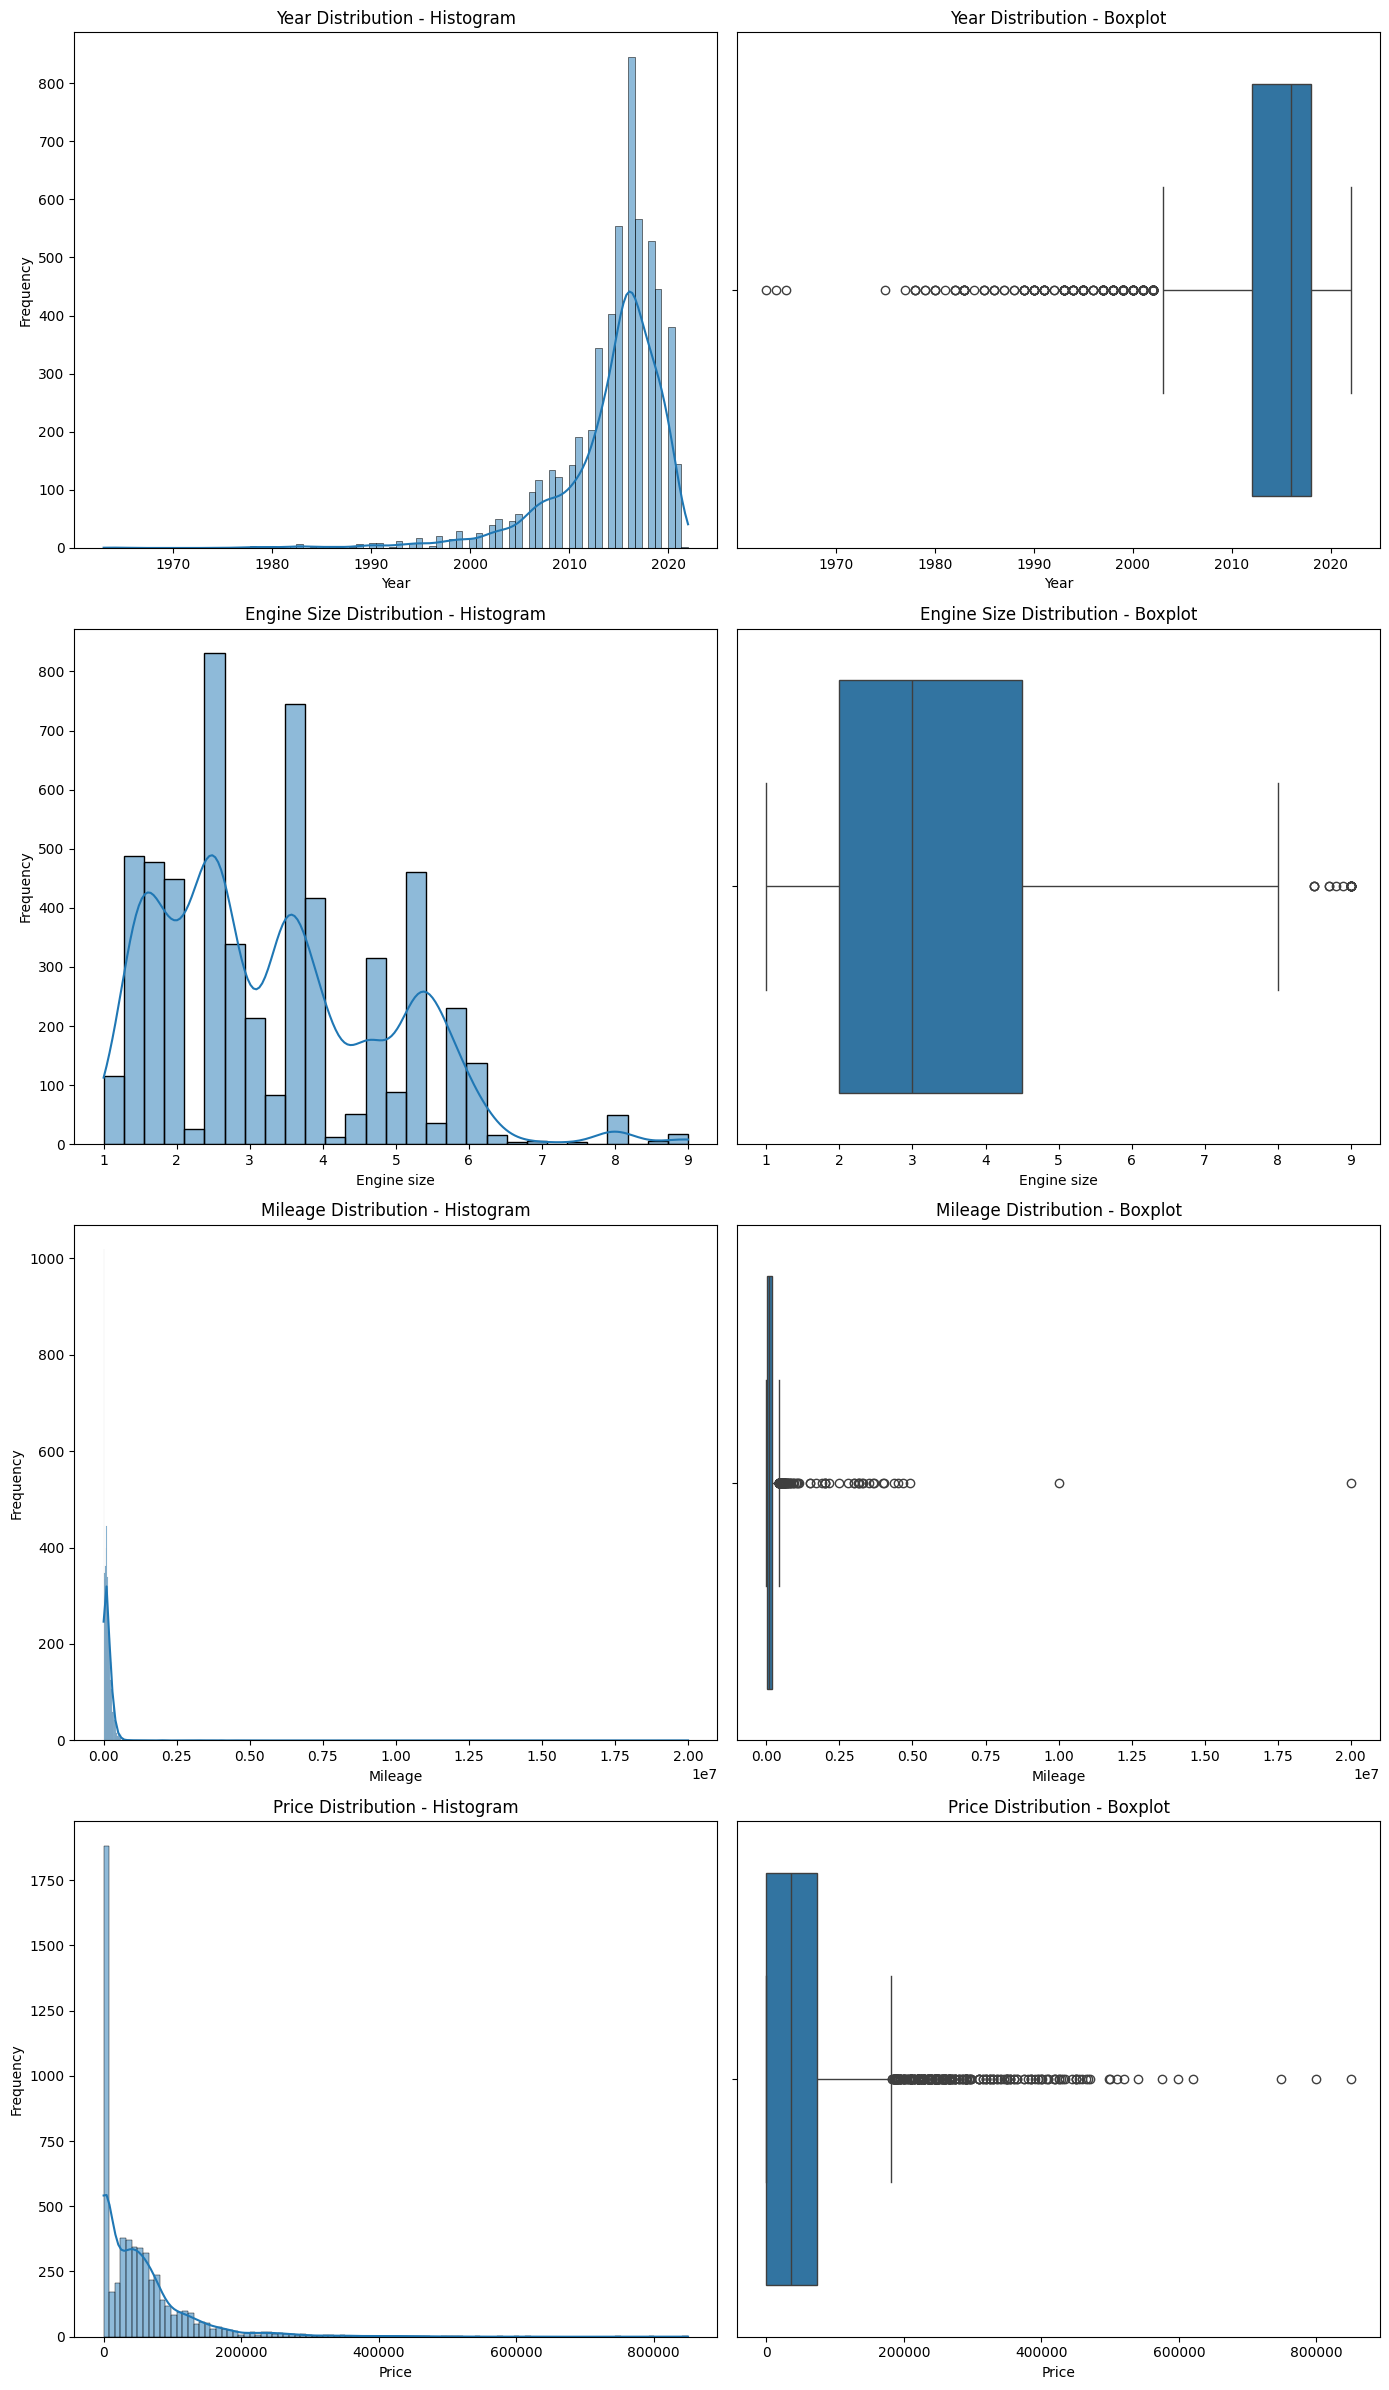

In [16]:
# Checking the numerical data distribution

# Creating a grid for 4 features (2 rows, 4 columns)
fig, axes = plt.subplots(4, 2, figsize=(14, 24))

# Year
sns.histplot(df_used_cars['Year'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Year Distribution - Histogram')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(x=df_used_cars['Year'], ax=axes[0, 1])
axes[0, 1].set_title('Year Distribution - Boxplot')
axes[0, 1].set_xlabel('Year')

# Engine Size
sns.histplot(df_used_cars['Engine_Size'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Engine Size Distribution - Histogram')
axes[1, 0].set_xlabel('Engine size')
axes[1, 0].set_ylabel('Frequency')

sns.boxplot(x=df_used_cars['Engine_Size'], ax=axes[1, 1])
axes[1, 1].set_title('Engine Size Distribution - Boxplot')
axes[1, 1].set_xlabel('Engine size')

# Mileage
sns.histplot(df_used_cars['Mileage'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Mileage Distribution - Histogram')
axes[2, 0].set_xlabel('Mileage')
axes[2, 0].set_ylabel('Frequency')

sns.boxplot(x=df_used_cars['Mileage'], ax=axes[2, 1])
axes[2, 1].set_title('Mileage Distribution - Boxplot')
axes[2, 1].set_xlabel('Mileage')

# Price
sns.histplot(df_used_cars['Price'], kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Price Distribution - Histogram')
axes[3, 0].set_xlabel('Price')
axes[3, 0].set_ylabel('Frequency')

sns.boxplot(x=df_used_cars['Price'], ax=axes[3, 1])
axes[3, 1].set_title('Price Distribution - Boxplot')
axes[3, 1].set_xlabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
# checking number of outliers

numerical = ['Year', 'Engine_Size', 'Mileage', 'Price']

def calculate_outliers(data,column): 
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5 * IQR)
    upper_bound = Q3+(1.5 * IQR)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
outlier_data = []

for i in numerical: 
    outliers_result, lower_bound, upper_bound = calculate_outliers(df_used_cars, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier/len(df_used_cars[i]*100),2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])


outlier_df = pd.DataFrame(outlier_data, columns=['column', 'total_outlier', 'percentage', 'lower_bound', 'upper_bound'])
outlier_df

column  total_outlier  percentage  lower_bound  upper_bound
0         Year            246        0.04      2003.00      2027.00
1  Engine_Size             23        0.00        -1.75         8.25
2      Mileage            175        0.03   -199000.00    433000.00
3        Price            261        0.05   -109500.00    182500.00

In [18]:
# Drop the Negotiable column
df_used_cars = df_used_cars.drop(columns='Negotiable')
df_used_cars

Type          Region        Make  Gear_Type       Origin  \
0         Corolla            Abha      Toyota     Manual        Saudi   
1           Yukon          Riyadh         GMC  Automatic        Saudi   
2     Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic   
3          Optima  Hafar Al-Batin         Kia  Automatic        Saudi   
4              FJ          Riyadh      Toyota  Automatic        Saudi   
...           ...             ...         ...        ...          ...   
5619      X-Trail          Jeddah      Nissan  Automatic        Saudi   
5620       Altima          Jeddah      Nissan  Automatic        Saudi   
5621        Yukon          Dammam         GMC  Automatic        Saudi   
5622           RX          Dammam       Lexus  Automatic  Gulf Arabic   
5623           ES          Jeddah       Lexus  Automatic        Other   

        Options  Year  Engine_Size  Mileage   Price  
0      Standard  2013          1.4   421000       0  
1          Full  2014          8.0    80000  120000  
2          Full  2015          5.0   140000  260000  
3     Semi Full  2015          2.4   220000   42000  
4          Full  2020          4.0    49000       0  
...         ...   ...          ...      ...     ...  
5619   Standard  2018          2.5    78794   68000  
5620  Semi Full  2020          2.5    58000       0  
5621       Full  2016          5.3    48000  145000  
5622       Full  2016          2.5    81000  154000  
5623       Full  2017          3.5   115000       0  

[5620 rows x 10 columns]

Drop the column Negotiable because I want to predict only for the price of non-negotible used-car.

In [19]:
# Checking unique value
pd.DataFrame({
    'feature': df_used_cars.columns.values, 
    'data_type': df_used_cars.dtypes.values, 
    'negative': [True if df_used_cars[i].dtype == int and (df_used_cars[i] < 0).any() else False for i in df_used_cars.columns],
    'n_unique': df_used_cars.nunique().values, 
    'sample_unique': [df_used_cars[i].unique() for i in df_used_cars.columns]

})

feature data_type  negative  n_unique  \
0         Type    object     False       347   
1       Region    object     False        27   
2         Make    object     False        58   
3    Gear_Type    object     False         2   
4       Origin    object     False         4   
5      Options    object     False         3   
6         Year     int64     False        50   
7  Engine_Size   float64     False        71   
8      Mileage     int64     False      1716   
9        Price     int64     False       467   

                                       sample_unique  
0  [Corolla, Yukon, Range Rover, Optima, FJ, CX3,...  
1  [Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, ...  
2  [Toyota, GMC, Land Rover, Kia, Mazda, Porsche,...  
3                                [Manual, Automatic]  
4               [Saudi, Gulf Arabic, Other, Unknown]  
5                        [Standard, Full, Semi Full]  
6  [2013, 2014, 2015, 2020, 2019, 2012, 2016, 199...  
7  [1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, ...  
8  [421000, 80000, 140000, 220000, 49000, 25000, ...  
9  [0, 120000, 260000, 42000, 58000, 85000, 48000...

There is an Unknown values inside the Origin column. Unknown is also means 'not knowing' similar to null values.

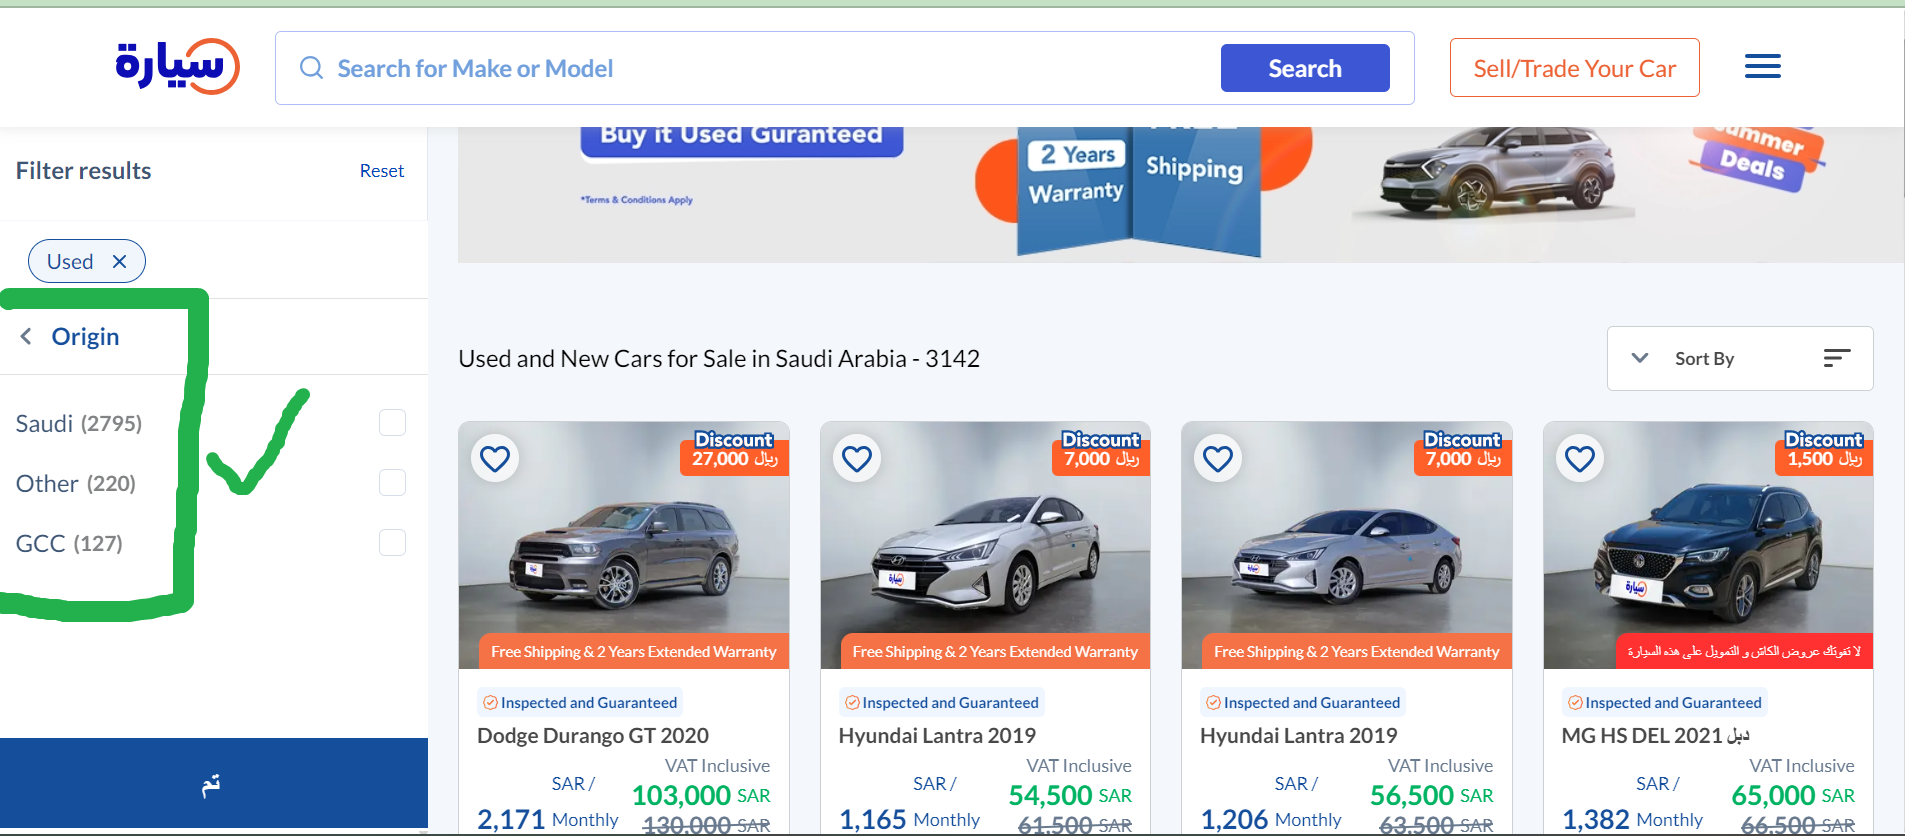

According to the data source website ([syarah.com](https://syarah.com/)), there is no Unknown type for Origin. The website only provide three categories which are Saudi, Other, and GCC (Gulf Arabic). Thus, it will be dropped out from the dataframe.

In [20]:
# Dropping 'Unknown' value
unknown_val = df_used_cars[df_used_cars['Origin'] == 'Unknown'].index
df_used_cars = df_used_cars.drop(unknown_val)
df_used_cars

Type          Region        Make  Gear_Type       Origin  \
0         Corolla            Abha      Toyota     Manual        Saudi   
1           Yukon          Riyadh         GMC  Automatic        Saudi   
2     Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic   
3          Optima  Hafar Al-Batin         Kia  Automatic        Saudi   
4              FJ          Riyadh      Toyota  Automatic        Saudi   
...           ...             ...         ...        ...          ...   
5619      X-Trail          Jeddah      Nissan  Automatic        Saudi   
5620       Altima          Jeddah      Nissan  Automatic        Saudi   
5621        Yukon          Dammam         GMC  Automatic        Saudi   
5622           RX          Dammam       Lexus  Automatic  Gulf Arabic   
5623           ES          Jeddah       Lexus  Automatic        Other   

        Options  Year  Engine_Size  Mileage   Price  
0      Standard  2013          1.4   421000       0  
1          Full  2014          8.0    80000  120000  
2          Full  2015          5.0   140000  260000  
3     Semi Full  2015          2.4   220000   42000  
4          Full  2020          4.0    49000       0  
...         ...   ...          ...      ...     ...  
5619   Standard  2018          2.5    78794   68000  
5620  Semi Full  2020          2.5    58000       0  
5621       Full  2016          5.3    48000  145000  
5622       Full  2016          2.5    81000  154000  
5623       Full  2017          3.5   115000       0  

[5559 rows x 10 columns]

In [21]:
# Numerical feature distribution
df_used_cars.describe()

Year  Engine_Size       Mileage          Price
count  5559.000000  5559.000000  5.559000e+03    5559.000000
mean   2014.119266     3.294945  1.503705e+05   53505.053607
std       5.777385     1.518333  3.847585e+05   70358.316560
min    1963.000000     1.000000  1.000000e+02       0.000000
25%    2013.000000     2.000000  3.730000e+04       0.000000
50%    2016.000000     3.000000  1.020000e+05   37000.000000
75%    2018.000000     4.500000  1.943550e+05   73000.000000
max    2022.000000     9.000000  2.000000e+07  850000.000000

It said the minimum value from the used car year is 1963. Thus, I will check the range of year inside the dataframe.

In [22]:
# Check the Year range inside the dataframe
min_year = df_used_cars['Year'].min()
max_year = df_used_cars['Year'].max()

print(f'The year range of used cars is from {min_year} to {max_year}.')


The year range of used cars is from 1963 to 2022.


Eventhough from the data above the car information doesn't look bad, I think car year from 1936 it's categorized as vintage car. Therefore, I'm creating the minimum limit by taking the data from the current website (syarah.com).


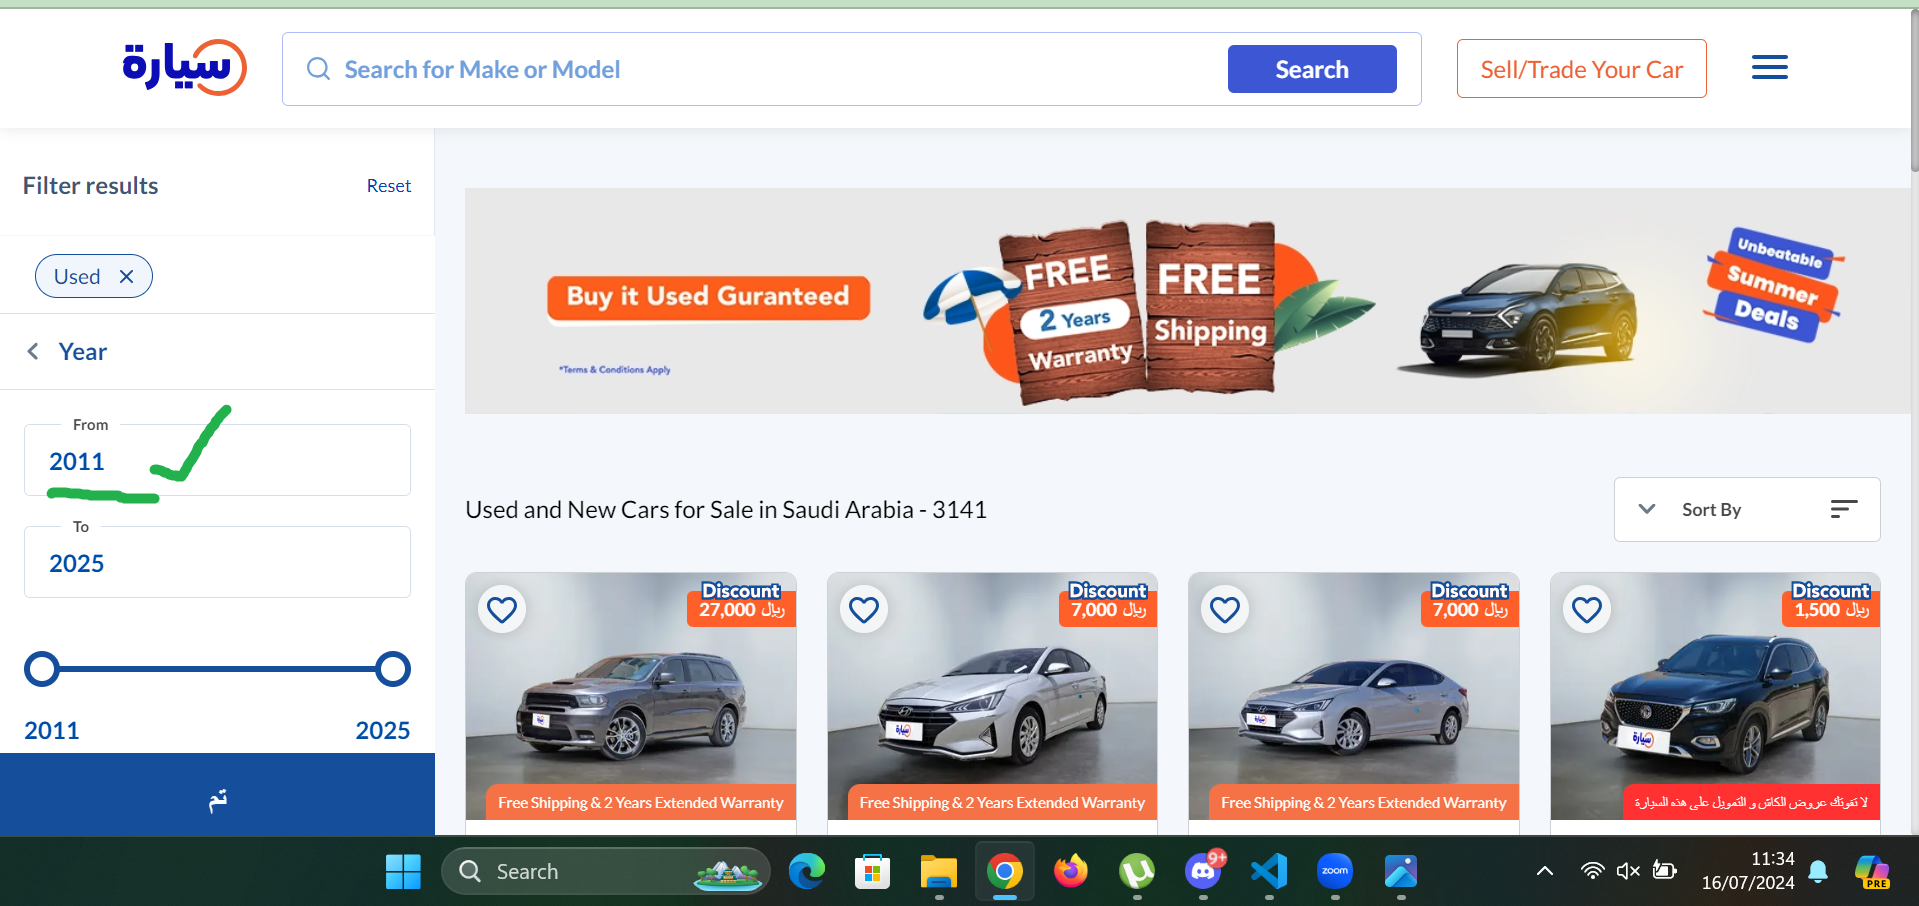

In [23]:
# Cut-off the year before 20011
data_pre2011 = df_used_cars[df_used_cars['Year'] < 2011]
df_used_cars = df_used_cars.drop(data_pre2011.index)
df_used_cars

Type          Region        Make  Gear_Type       Origin  \
0         Corolla            Abha      Toyota     Manual        Saudi   
1           Yukon          Riyadh         GMC  Automatic        Saudi   
2     Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic   
3          Optima  Hafar Al-Batin         Kia  Automatic        Saudi   
4              FJ          Riyadh      Toyota  Automatic        Saudi   
...           ...             ...         ...        ...          ...   
5619      X-Trail          Jeddah      Nissan  Automatic        Saudi   
5620       Altima          Jeddah      Nissan  Automatic        Saudi   
5621        Yukon          Dammam         GMC  Automatic        Saudi   
5622           RX          Dammam       Lexus  Automatic  Gulf Arabic   
5623           ES          Jeddah       Lexus  Automatic        Other   

        Options  Year  Engine_Size  Mileage   Price  
0      Standard  2013          1.4   421000       0  
1          Full  2014          8.0    80000  120000  
2          Full  2015          5.0   140000  260000  
3     Semi Full  2015          2.4   220000   42000  
4          Full  2020          4.0    49000       0  
...         ...   ...          ...      ...     ...  
5619   Standard  2018          2.5    78794   68000  
5620  Semi Full  2020          2.5    58000       0  
5621       Full  2016          5.3    48000  145000  
5622       Full  2016          2.5    81000  154000  
5623       Full  2017          3.5   115000       0  

[4564 rows x 10 columns]

Dropped the rows contains of used car from year below 2011.

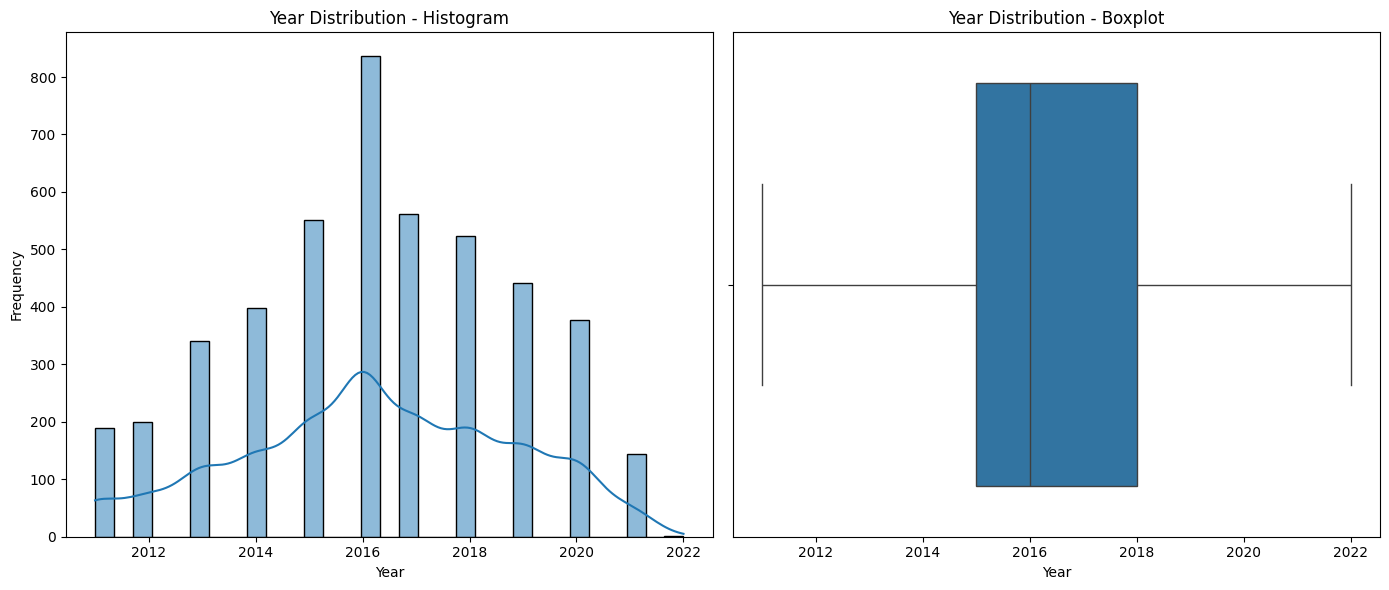

In [24]:
# Check the distribution of year column

# Year
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram Plot
sns.histplot(df_used_cars['Year'], kde=True, ax=axes[0])
axes[0].set_title('Year Distribution - Histogram')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(x=df_used_cars['Year'], ax=axes[1])
axes[1].set_title('Year Distribution - Boxplot')
axes[1].set_xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

In [25]:
# Check the price range
min_price = df_used_cars['Price'].min()
max_price = df_used_cars['Price'].max()

print(f'The price range of cars is from {min_price} to {max_price}.')

The price range of cars is from 0 to 850000.


Since it doesn't make sense if the used car price is 0, I will create minimum limit to 26000. This price get from round up price from the minimum price on the price range on the website source of the dataset.

I also going to create a maximum limit price for 300000. After observation from the dataset and internet research, this price range is a sweet spot to get an affordable used car,  for example, if a buyer looking for an old luxury type of car.This price also a common price for a common used car in Saudi Arabia.

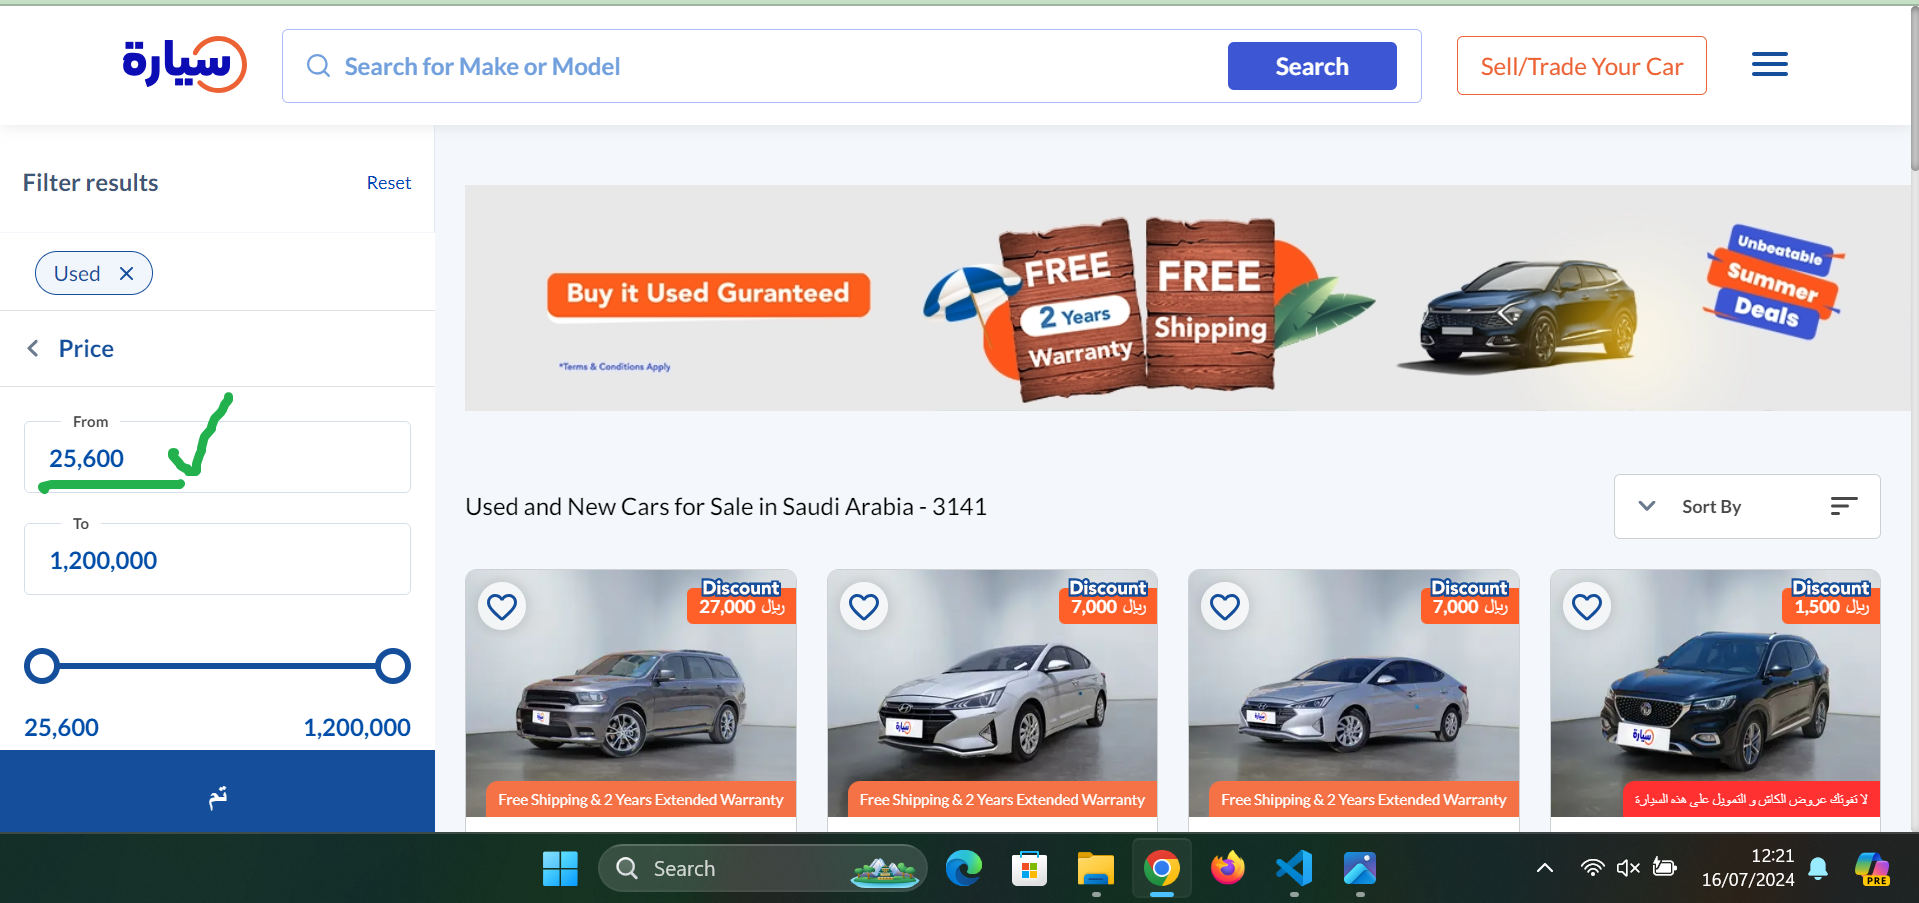

In [26]:
# Drop the price below the 26000
price_minout = df_used_cars[df_used_cars['Price'] < 26000]
df_used_cars = df_used_cars.drop(price_minout.index)
df_used_cars

Type          Region        Make  Gear_Type       Origin  \
1           Yukon          Riyadh         GMC  Automatic        Saudi   
2     Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic   
3          Optima  Hafar Al-Batin         Kia  Automatic        Saudi   
5             CX3            Abha       Mazda  Automatic        Saudi   
6       Cayenne S          Riyadh     Porsche  Automatic        Saudi   
...           ...             ...         ...        ...          ...   
5615            6          Jeddah       Mazda  Automatic        Saudi   
5616          CX9          Qassim       Mazda  Automatic        Saudi   
5619      X-Trail          Jeddah      Nissan  Automatic        Saudi   
5621        Yukon          Dammam         GMC  Automatic        Saudi   
5622           RX          Dammam       Lexus  Automatic  Gulf Arabic   

        Options  Year  Engine_Size  Mileage   Price  
1          Full  2014          8.0    80000  120000  
2          Full  2015          5.0   140000  260000  
3     Semi Full  2015          2.4   220000   42000  
5     Semi Full  2019          2.0    25000   58000  
6          Full  2012          4.8   189000   85000  
...         ...   ...          ...      ...     ...  
5615  Semi Full  2017          2.5   106000   56000  
5616       Full  2020          2.0     9500  132000  
5619   Standard  2018          2.5    78794   68000  
5621       Full  2016          5.3    48000  145000  
5622       Full  2016          2.5    81000  154000  

[3048 rows x 10 columns]

In [27]:
price_maxout = df_used_cars[df_used_cars['Price'] > 300000]
df_used_cars = df_used_cars.drop(price_maxout.index)
df_used_cars

Type          Region        Make  Gear_Type       Origin  \
1           Yukon          Riyadh         GMC  Automatic        Saudi   
2     Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic   
3          Optima  Hafar Al-Batin         Kia  Automatic        Saudi   
5             CX3            Abha       Mazda  Automatic        Saudi   
6       Cayenne S          Riyadh     Porsche  Automatic        Saudi   
...           ...             ...         ...        ...          ...   
5615            6          Jeddah       Mazda  Automatic        Saudi   
5616          CX9          Qassim       Mazda  Automatic        Saudi   
5619      X-Trail          Jeddah      Nissan  Automatic        Saudi   
5621        Yukon          Dammam         GMC  Automatic        Saudi   
5622           RX          Dammam       Lexus  Automatic  Gulf Arabic   

        Options  Year  Engine_Size  Mileage   Price  
1          Full  2014          8.0    80000  120000  
2          Full  2015          5.0   140000  260000  
3     Semi Full  2015          2.4   220000   42000  
5     Semi Full  2019          2.0    25000   58000  
6          Full  2012          4.8   189000   85000  
...         ...   ...          ...      ...     ...  
5615  Semi Full  2017          2.5   106000   56000  
5616       Full  2020          2.0     9500  132000  
5619   Standard  2018          2.5    78794   68000  
5621       Full  2016          5.3    48000  145000  
5622       Full  2016          2.5    81000  154000  

[2975 rows x 10 columns]

In [28]:
# Check the final price range
min_price = df_used_cars['Price'].min()
max_price = df_used_cars['Price'].max()

print(f'The price range of cars is from {min_price} to {max_price}.')

The price range of cars is from 26000 to 298000.


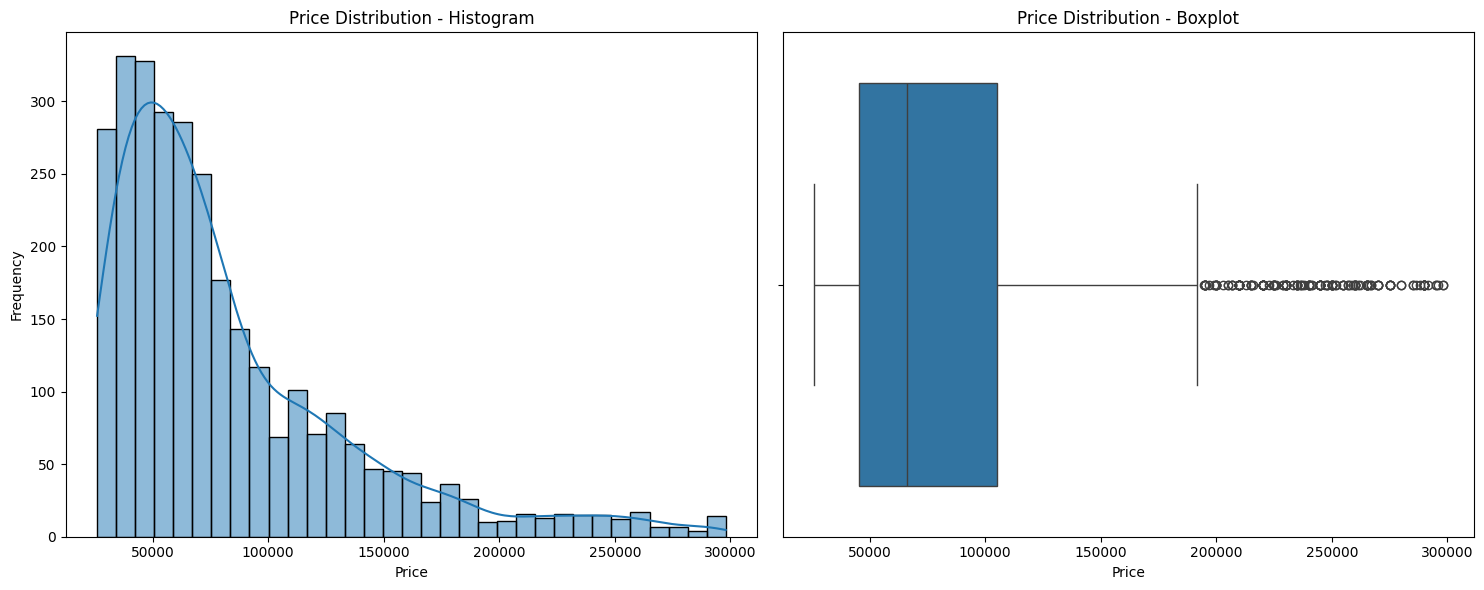

In [29]:
# Price
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram Plot
sns.histplot(df_used_cars['Price'], kde=True, ax=axes[0])
axes[0].set_title('Price Distribution - Histogram')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(x=df_used_cars['Price'], ax=axes[1])
axes[1].set_title('Price Distribution - Boxplot')
axes[1].set_xlabel('Price')

# Display the plots
plt.tight_layout()
plt.show()


I keep the outliers because it's part of the price range.

In [30]:
# Check the mileage range
min_mil = df_used_cars['Mileage'].min()
max_mil = df_used_cars['Mileage'].max()

print(f'The mileage range of cars is from {min_mil} to {max_mil}.')

The mileage range of cars is from 100 to 3640000.


After checking the mileage range in data, I find that the maximum range for mileage is over from the average mileage for good condition of used car. Thus, I will put a maximum limit to 277000 which is taken from round up the number of maximum odometer in teh website.

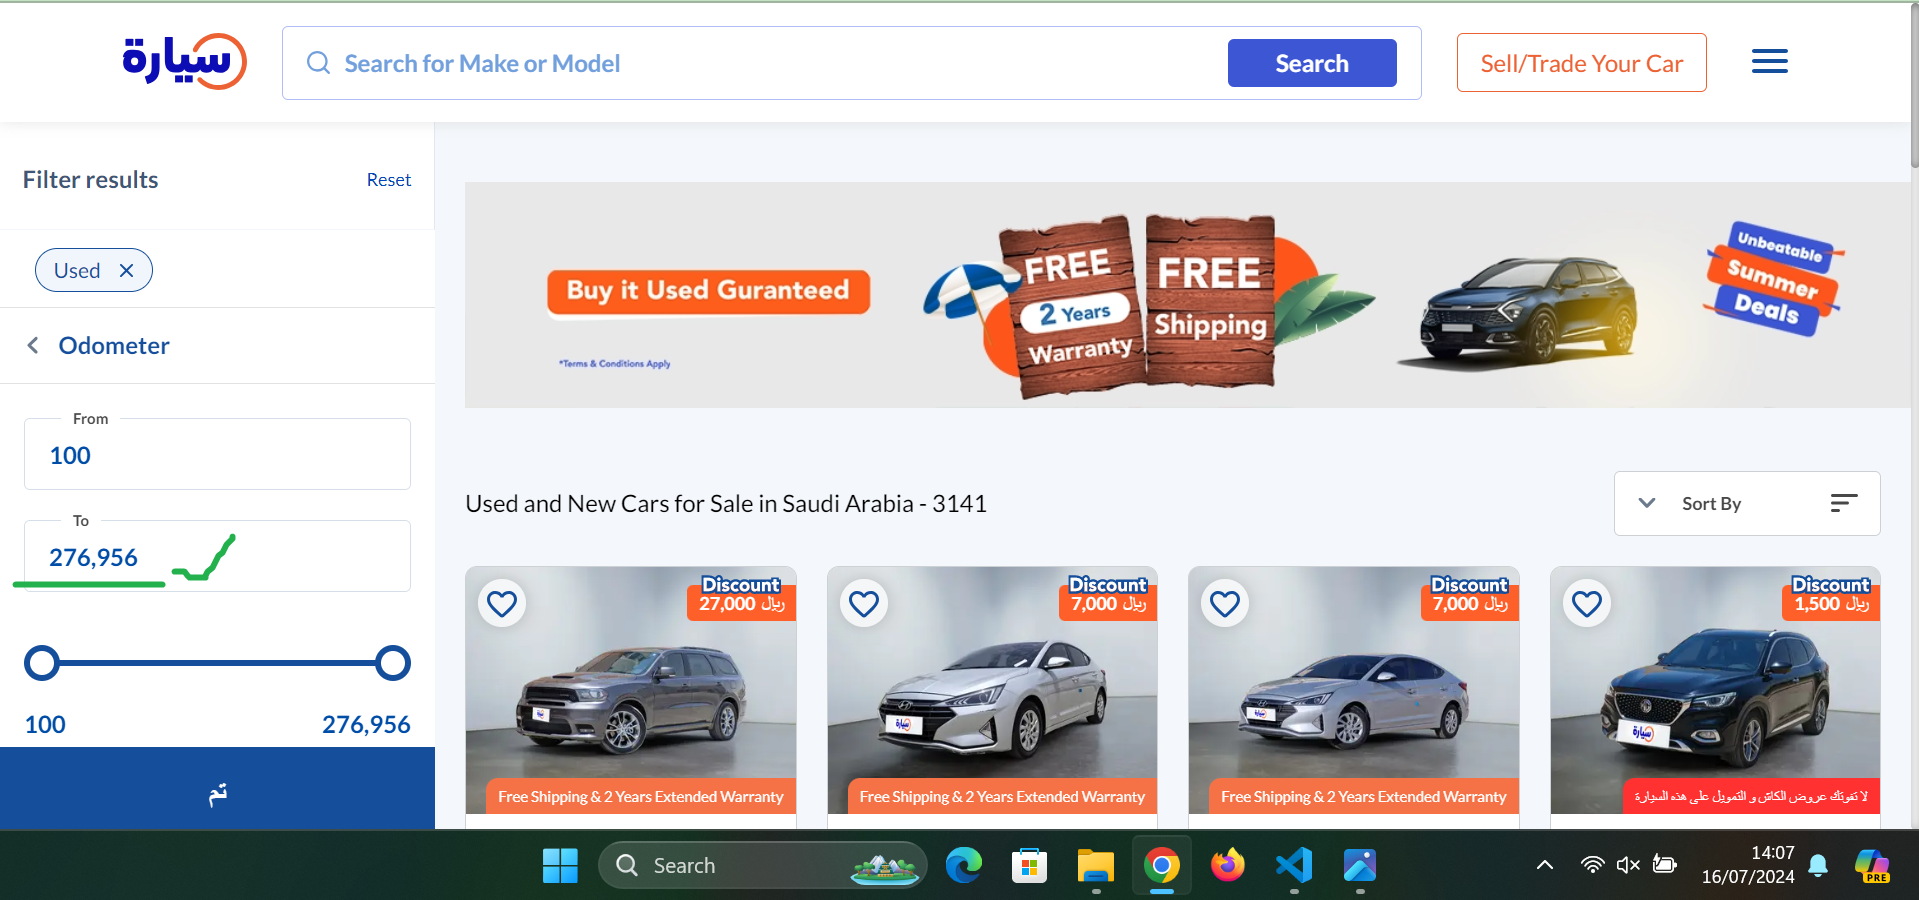

In [31]:
# Drop the mileage above the max limit
drop_mil = df_used_cars[df_used_cars['Mileage'] > 277000]
df_used_cars = df_used_cars.drop(drop_mil.index)
df_used_cars

Type          Region        Make  Gear_Type       Origin  \
1           Yukon          Riyadh         GMC  Automatic        Saudi   
2     Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic   
3          Optima  Hafar Al-Batin         Kia  Automatic        Saudi   
5             CX3            Abha       Mazda  Automatic        Saudi   
6       Cayenne S          Riyadh     Porsche  Automatic        Saudi   
...           ...             ...         ...        ...          ...   
5615            6          Jeddah       Mazda  Automatic        Saudi   
5616          CX9          Qassim       Mazda  Automatic        Saudi   
5619      X-Trail          Jeddah      Nissan  Automatic        Saudi   
5621        Yukon          Dammam         GMC  Automatic        Saudi   
5622           RX          Dammam       Lexus  Automatic  Gulf Arabic   

        Options  Year  Engine_Size  Mileage   Price  
1          Full  2014          8.0    80000  120000  
2          Full  2015          5.0   140000  260000  
3     Semi Full  2015          2.4   220000   42000  
5     Semi Full  2019          2.0    25000   58000  
6          Full  2012          4.8   189000   85000  
...         ...   ...          ...      ...     ...  
5615  Semi Full  2017          2.5   106000   56000  
5616       Full  2020          2.0     9500  132000  
5619   Standard  2018          2.5    78794   68000  
5621       Full  2016          5.3    48000  145000  
5622       Full  2016          2.5    81000  154000  

[2808 rows x 10 columns]

In [32]:
# Check the mileage range again
min_mil = df_used_cars['Mileage'].min()
max_mil = df_used_cars['Mileage'].max()

print(f'The mileage range of cars is from {min_mil} to {max_mil}.')

The mileage range of cars is from 100 to 277000.


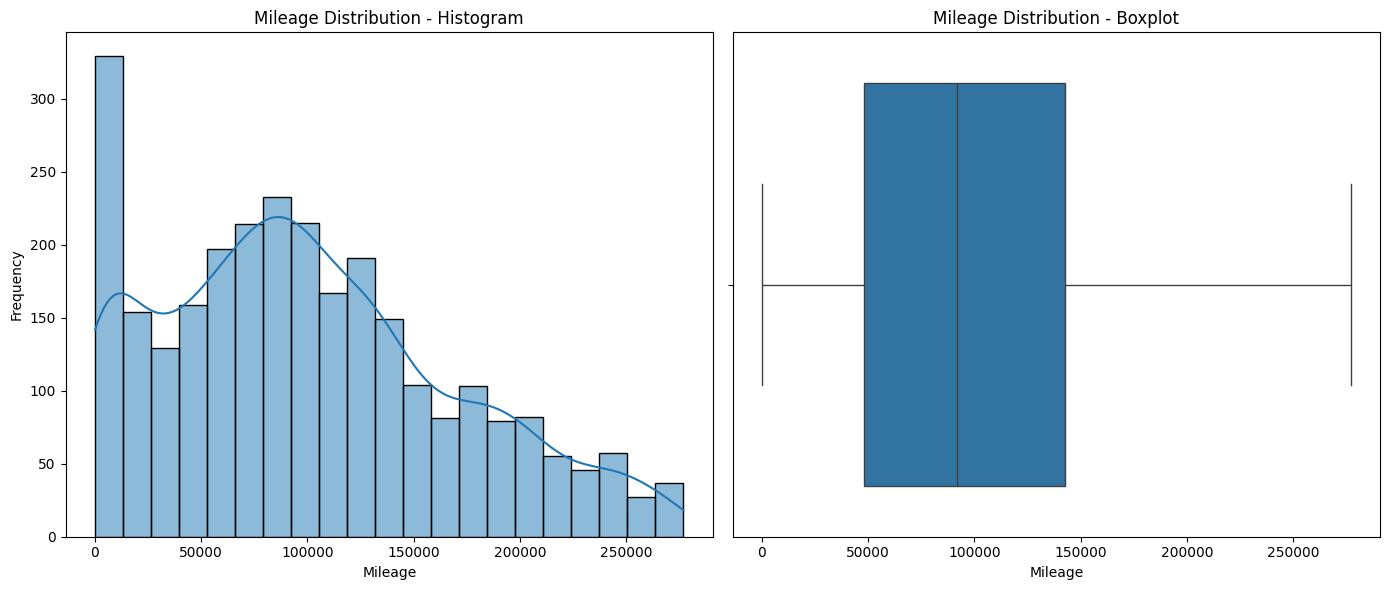

In [33]:
#  Check the Mileage data distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram Plot
sns.histplot(df_used_cars['Mileage'], kde=True, ax=axes[0])
axes[0].set_title('Mileage Distribution - Histogram')
axes[0].set_xlabel('Mileage')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(x=df_used_cars['Mileage'], ax=axes[1])
axes[1].set_title('Mileage Distribution - Boxplot')
axes[1].set_xlabel('Mileage')

# Display the plots
plt.tight_layout()
plt.show()

In [34]:
# Check the Engine size range
min_engine = df_used_cars['Engine_Size'].min()
max_engine = df_used_cars['Engine_Size'].max()

print(f'The engine_size range of cars is from {min_engine} to {max_engine}.')

The engine_size range of cars is from 1.0 to 9.0.


I also decide to following the website to create a maximum limit for engine size of a used car which is 6.6

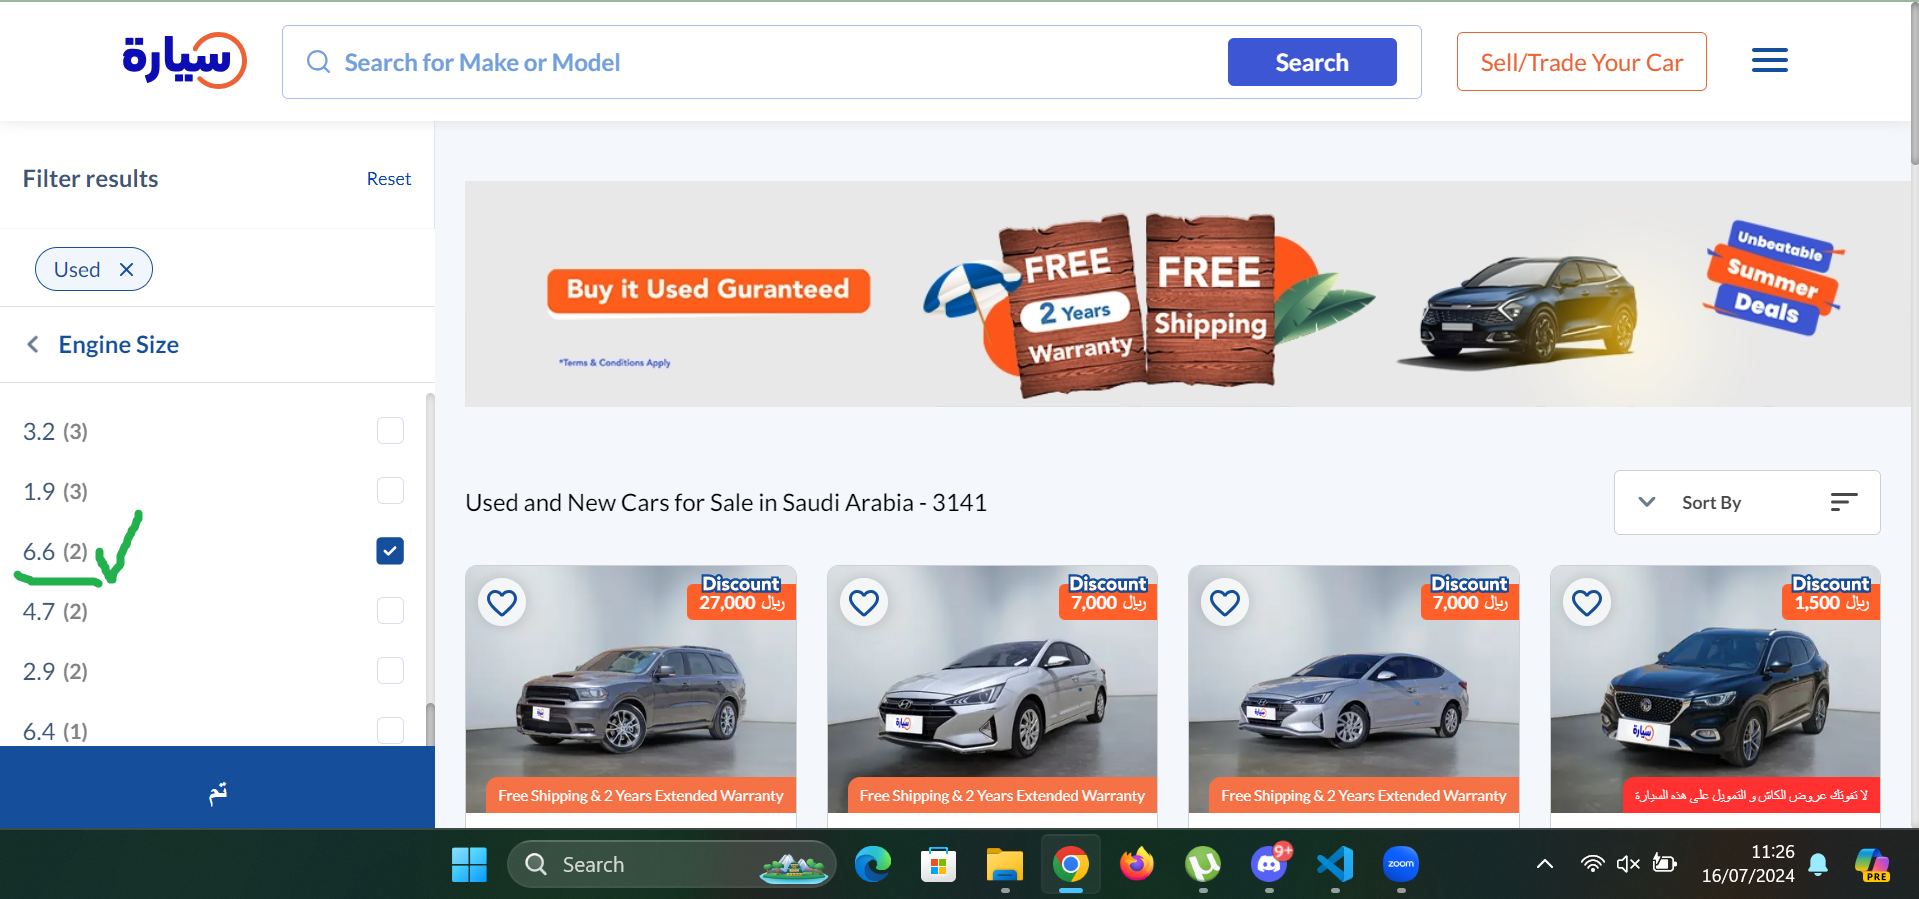

In [35]:
# Drop the engine_size above the max limit
drop_Esize = df_used_cars[df_used_cars['Engine_Size'] > 6.6]
df_used_cars = df_used_cars.drop(drop_Esize.index)
df_used_cars

Type          Region        Make  Gear_Type       Origin  \
2     Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic   
3          Optima  Hafar Al-Batin         Kia  Automatic        Saudi   
5             CX3            Abha       Mazda  Automatic        Saudi   
6       Cayenne S          Riyadh     Porsche  Automatic        Saudi   
7          Sonata          Riyadh     Hyundai  Automatic        Saudi   
...           ...             ...         ...        ...          ...   
5615            6          Jeddah       Mazda  Automatic        Saudi   
5616          CX9          Qassim       Mazda  Automatic        Saudi   
5619      X-Trail          Jeddah      Nissan  Automatic        Saudi   
5621        Yukon          Dammam         GMC  Automatic        Saudi   
5622           RX          Dammam       Lexus  Automatic  Gulf Arabic   

        Options  Year  Engine_Size  Mileage   Price  
2          Full  2015          5.0   140000  260000  
3     Semi Full  2015          2.4   220000   42000  
5     Semi Full  2019          2.0    25000   58000  
6          Full  2012          4.8   189000   85000  
7          Full  2016          2.4      155   48000  
...         ...   ...          ...      ...     ...  
5615  Semi Full  2017          2.5   106000   56000  
5616       Full  2020          2.0     9500  132000  
5619   Standard  2018          2.5    78794   68000  
5621       Full  2016          5.3    48000  145000  
5622       Full  2016          2.5    81000  154000  

[2787 rows x 10 columns]

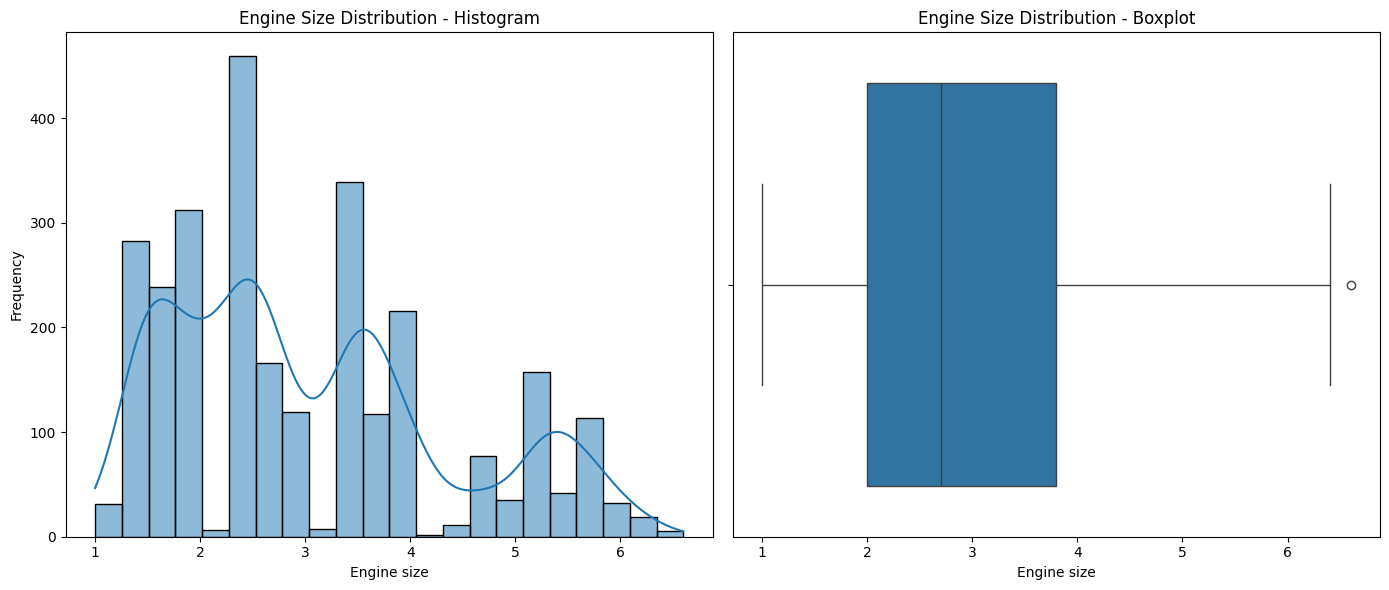

In [36]:
# Engine Size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram Plot
sns.histplot(df_used_cars['Engine_Size'], kde=True, ax=axes[0])
axes[0].set_title('Engine Size Distribution - Histogram')
axes[0].set_xlabel('Engine size')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(x=df_used_cars['Engine_Size'], ax=axes[1])
axes[1].set_title('Engine Size Distribution - Boxplot')
axes[1].set_xlabel('Engine size')

# Display the plots
plt.tight_layout()
plt.show()

Since there is one outlier and it probably won't affect much for the model, I will delete it.

In [38]:
# Drop the outlier of engine size
drop_EsizeOut = df_used_cars[df_used_cars['Engine_Size'] > 6.3]
df_used_cars = df_used_cars.drop(drop_EsizeOut.index)
df_used_cars

Type          Region        Make  Gear_Type       Origin  \
2     Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic   
3          Optima  Hafar Al-Batin         Kia  Automatic        Saudi   
5             CX3            Abha       Mazda  Automatic        Saudi   
6       Cayenne S          Riyadh     Porsche  Automatic        Saudi   
7          Sonata          Riyadh     Hyundai  Automatic        Saudi   
...           ...             ...         ...        ...          ...   
5615            6          Jeddah       Mazda  Automatic        Saudi   
5616          CX9          Qassim       Mazda  Automatic        Saudi   
5619      X-Trail          Jeddah      Nissan  Automatic        Saudi   
5621        Yukon          Dammam         GMC  Automatic        Saudi   
5622           RX          Dammam       Lexus  Automatic  Gulf Arabic   

        Options  Year  Engine_Size  Mileage   Price  
2          Full  2015          5.0   140000  260000  
3     Semi Full  2015          2.4   220000   42000  
5     Semi Full  2019          2.0    25000   58000  
6          Full  2012          4.8   189000   85000  
7          Full  2016          2.4      155   48000  
...         ...   ...          ...      ...     ...  
5615  Semi Full  2017          2.5   106000   56000  
5616       Full  2020          2.0     9500  132000  
5619   Standard  2018          2.5    78794   68000  
5621       Full  2016          5.3    48000  145000  
5622       Full  2016          2.5    81000  154000  

[2782 rows x 10 columns]

In [39]:
# Check the Engine size range
min_engine = df_used_cars['Engine_Size'].min()
max_engine = df_used_cars['Engine_Size'].max()

print(f'The engine_size range of cars is from {min_engine} to {max_engine}.')

The engine_size range of cars is from 1.0 to 6.3.


In [40]:
# checking number of outliers again

numerical = ['Year', 'Engine_Size', 'Mileage', 'Price']

def calculate_outliers(data,column): 
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5 * IQR)
    upper_bound = Q3+(1.5 * IQR)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
outlier_data = []

for i in numerical: 
    outliers_result, lower_bound, upper_bound = calculate_outliers(df_used_cars, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier/len(df_used_cars[i]*100),2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])


outlier_df = pd.DataFrame(outlier_data, columns=['column', 'total_outlier', 'percentage', 'lower_bound', 'upper_bound'])
outlier_df

column  total_outlier  percentage  lower_bound  upper_bound
0         Year              0        0.00       2010.5       2022.5
1  Engine_Size              0        0.00         -0.7          6.5
2      Mileage              0        0.00     -93000.0     283000.0
3        Price            145        0.05     -43000.0     197000.0

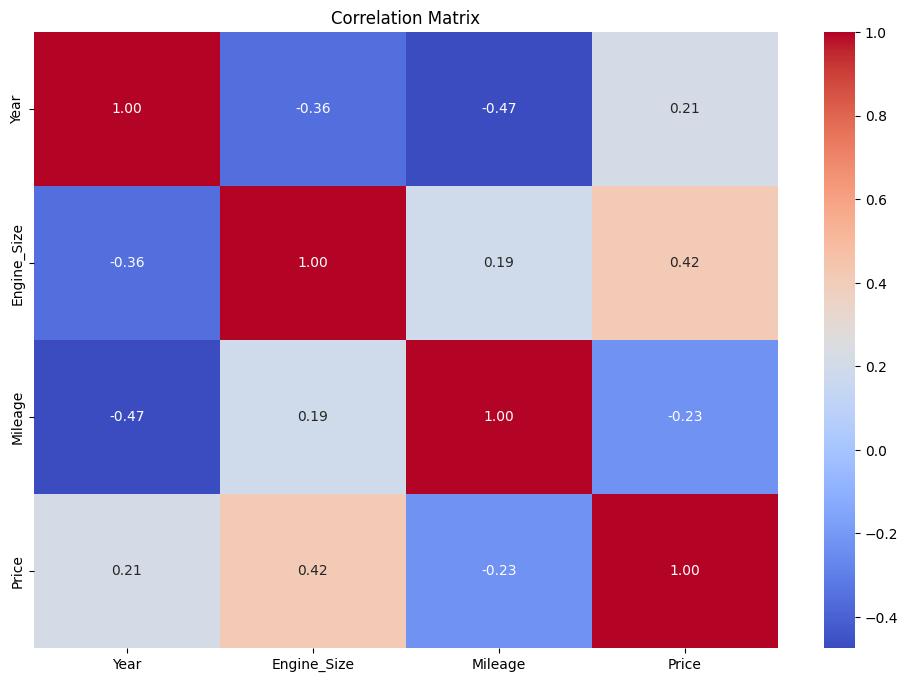

In [41]:
# Checking matrix correlation
#Heatmap numerical data
plt.figure(figsize=(12, 8))
corr_matrix = df_used_cars[['Year', 'Engine_Size', 'Mileage', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Here's a general explanation of correlation matrix:

 - Diagonal Elements: Each variable is perfectly correlated with itself, so all diagonal elements are 1.
Off-Diagonal Elements: These show the correlation between different pairs of variables.

 - Values close to 1 or -1 indicate a strong correlation, either positive (direct relationship) or negative (inverse relationship).

 - Values close to 0 indicate little to no linear correlation.

Here's the interprestation of correlation matrix above:
1. Year and Price (0.21):

There is a positive correlation of 0.21 between Year and Price. This suggests that, generally, newer cars tend to have higher prices. However, the correlation is not very strong, indicating that while the year of manufacture does have some influence on the price, other factors also play significant roles.

2. Engine_Size and Price (0.42):

There is a moderate positive correlation of 0.42 between Engine_Size and Price. This indicates that cars with larger engine sizes tend to have higher prices. This relationship is stronger than the one between Year and Price, suggesting that engine size is a more significant determinant of the car's price.

3. Mileage and Price (-0.23):

There is a negative correlation of -0.23 between Mileage and Price. This indicates that cars with higher mileage tend to have lower prices. While the correlation is not very strong, it does suggest that mileage is inversely related to price, meaning that as cars are driven more, their value tends to decrease.

In summary, the Engine_Size has the strongest positive correlation with Price, suggesting that it is a significant factor in determining the price of used cars. Year also positively influences the price, albeit to a lesser extent. Conversely, Mileage shows a negative relationship with Price, indicating that higher mileage generally leads to lower prices.








#### Check the dataset in general

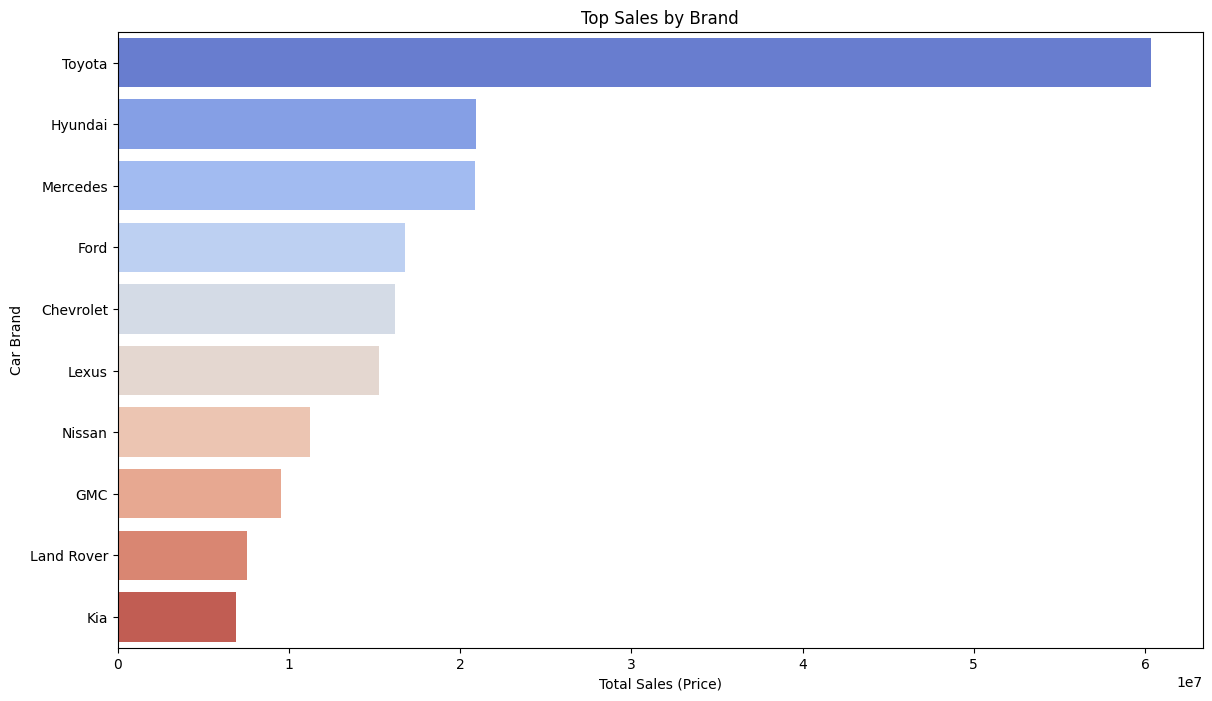

In [42]:
# Top sales from Car Brand

# Group by car make and sum the prices
top_sales = df_used_cars.groupby('Make')['Price'].sum().reset_index()


# Sort the values to find the top sales
top_sales = top_sales.sort_values(by='Price', ascending=False).head(10) 


# # Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='Price', y='Make', data=top_sales, palette='coolwarm')
plt.title('Top Sales by Brand')
plt.xlabel('Total Sales (Price)')
plt.ylabel('Car Brand')
plt.show()

In [45]:
top_sales

Make     Price
42      Toyota  60352800
21     Hyundai  20939620
35    Mercedes  20844500
12        Ford  16810093
6    Chevrolet  16178000
29       Lexus  15284500
37      Nissan  11258500
15         GMC   9564500
28  Land Rover   7551000
27         Kia   6928750

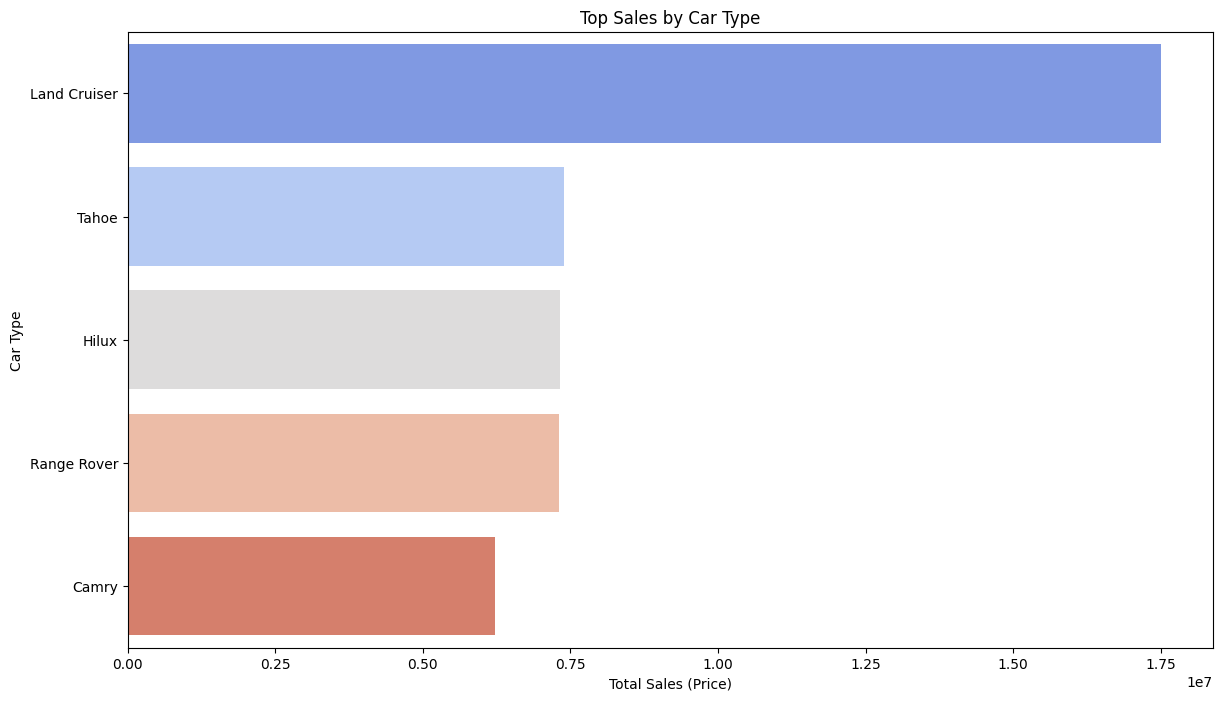

In [49]:
# Top sales car type
top_sales_car_type= df_used_cars.groupby('Type')['Price'].sum().reset_index()
top_sales_car_type = top_sales_car_type.sort_values(by='Price', ascending=False).head(5)

# # Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='Price', y='Type', data=top_sales_car_type, palette='coolwarm')
plt.title('Top Sales by Car Type')
plt.xlabel('Total Sales (Price)')
plt.ylabel('Car Type')
plt.show()

In [50]:
top_sales_car_type

Type     Price
148  Land Cruiser  17508500
223         Tahoe   7394000
133         Hilux   7320500
194   Range Rover   7311000
56          Camry   6213900

Landcruiser from Toyota become the most profitable used car with total of income 17.508.500

In [54]:
# Group by car type and count the number of entries
car_type_counts = df_used_cars['Type'].value_counts().reset_index()
car_type_counts.columns = ['Type', 'Count']

# Sort by count in descending order
top_car_type_counts = car_type_counts.sort_values(by='Count', ascending=False).head(5)
top_car_type_counts

Type  Count
0        Accent    121
2         Camry     97
1        Sonata     97
3         Hilux     95
4  Land Cruiser     91

In [83]:
# Most sold car by the engine size
sales_counts = df_used_cars.groupby(['Engine_Size', 'Price']).size().reset_index(name='Sales_Count')

# For each engine size, find the price with the maximum sales count
most_sold_per_engine_size = sales_counts.loc[sales_counts.groupby('Engine_Size')['Sales_Count'].idxmax()]

most_sold_per_engine_size.sort_values(by='Sales_Count', ascending= False).head(5)

Engine_Size  Price  Sales_Count
146          1.6  30000           20
410          2.4  45000           14
48           1.4  35000           12
824          3.5  75000           11
493          2.5  50000           11

In [64]:
# Most sold car by the year
sales_counts = df_used_cars.groupby(['Year', 'Make', 'Type']).size().reset_index(name='Sales_Count')

# # For each year, find the car with the maximum sales count
most_sold_per_year = sales_counts.loc[sales_counts.groupby('Year')['Sales_Count'].idxmax()]

most_sold_per_year.sort_values(by='Sales_Count', ascending= False).head(5)

Year     Make    Type  Sales_Count
483  2017  Hyundai  Accent           40
576  2018  Hyundai  Accent           35
661  2019  Hyundai  Accent           34
435  2016   Toyota   Hilux           31
244  2015     Ford  Taurus           18

Accent 2017 from Hyundai become the highest amount of car that is sold.

In [56]:
# Top sales region
top_sales_by_region = df_used_cars.groupby('Region')['Price'].sum().reset_index().sort_values(by='Price', ascending=False).head(5)

top_sales_by_region

Region      Price
20   Riyadh  104533887
9    Dammam   54556400
13   Jeddah   33464819
18   Qassim    6833900
1   Al-Ahsa    5727300

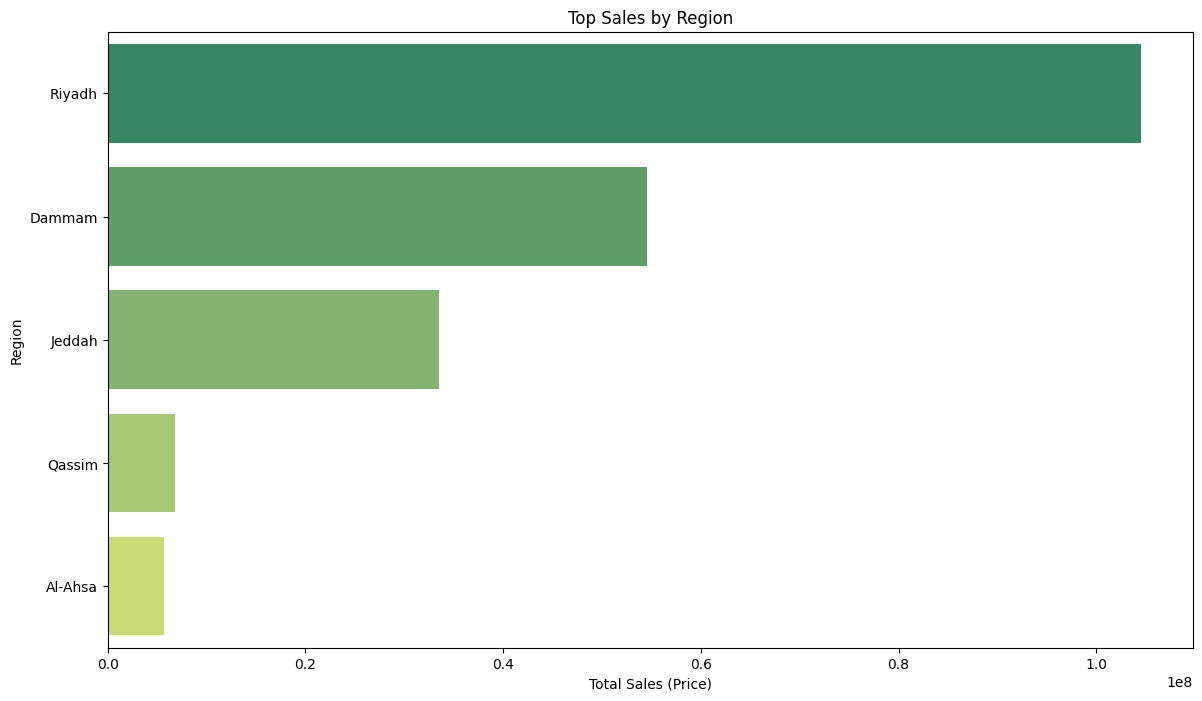

In [57]:
# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='Price', y='Region', data=top_sales_by_region, palette='summer')
plt.title('Top Sales by Region')
plt.xlabel('Total Sales (Price)')
plt.ylabel('Region')
plt.show()

Riyadh become the most profitable region.

Summary:
 - Brand: Toyota emerges as the most profitable brand for used cars priced under 300k, with the Land Cruiser model leading the way.
 - Sales Volume: However, in terms of sales volume, the Hyundai Accent reigns supreme.
 - Location: Interestingly, most of these sales are concentrated in Riyadh.
 - Engine Size: Notably, used cars with an engine size of 1.6 liters appear to be the most popular choice among buyers.

## Create Model

Data splitting

In [65]:
X = df_used_cars.drop('Price', axis=1)
y = df_used_cars['Price']

Train the data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
X,
y, 
test_size=0.3,
random_state=42)

In [67]:
# Check the shape of X train and X test
X_train.shape, X_test.shape

((1947, 9), (835, 9))

#### Feature Engineering & Preprocessing

Here we are going to selecting the features and transform it using encoding technique so the categorical data can be used inside the model.
Type encoding that I used:
 - One hot encoder: Gear_Type, Origin, Options

    this encoding is used to convert categorical variables into a form that can be more easily used for machine learning algorithms by creates a new binary feature (column) for each category.

 - Binary encoder: Type, Region, Make
 
    this encoding is used in data preprocessing and feature engineering, particularly for categorical variables with a large number of unique categories. 

In [68]:
preprocessor = ColumnTransformer(transformers=[
    ('one_hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options',]),
    ('binary', ce.BinaryEncoder(), ['Type', 'Region', 'Make']),
    ('scaler', StandardScaler(), ['Year', 'Engine_Size', 'Mileage'])
    ], remainder='passthrough')

Standard scaler because I have remove all outliers of the numerical features column such as Year, Engine_size, and Mileage.

In [69]:
# Apply the preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [70]:
# Checking the shapes
print(f"Shape of X_train_preprocessed: {X_train_preprocessed.shape}")
print(f"Shape of X_test_preprocessed: {X_test_preprocessed.shape}")

Shape of X_train_preprocessed: (1947, 27)
Shape of X_test_preprocessed: (835, 27)


In [71]:
# Combining the features into one dataframe and 

# Get the names of the one-hot encoded columns
one_hot_columns = preprocessor.named_transformers_['one_hot'].get_feature_names_out(['Gear_Type', 'Origin', 'Options'])
# Get the names of the binary encoded columns
binary_columns = preprocessor.named_transformers_['binary'].get_feature_names_out(['Type', 'Region', 'Make'])
# RobustScaler does not change column names
standard_columns = ['Year', 'Engine_Size', 'Mileage']

# Combine all the column names
features = list(one_hot_columns) + list(binary_columns) + list(standard_columns)

# Convert to DataFrame
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=features)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=features)

X_train_preprocessed

Gear_Type_Manual  Origin_Other  Origin_Saudi  Options_Semi Full  \
0                  0.0           0.0           1.0                0.0   
1                  0.0           0.0           1.0                0.0   
2                  0.0           0.0           1.0                0.0   
3                  0.0           0.0           1.0                0.0   
4                  0.0           0.0           1.0                0.0   
...                ...           ...           ...                ...   
1942               0.0           0.0           0.0                0.0   
1943               0.0           0.0           1.0                0.0   
1944               0.0           0.0           1.0                1.0   
1945               0.0           0.0           1.0                0.0   
1946               0.0           0.0           1.0                0.0   

      Options_Standard  Type_0  Type_1  Type_2  Type_3  Type_4  ...  Region_4  \
0                  0.0     0.0     0.0     0.0     0.0     0.0  ...       1.0   
1                  1.0     0.0     0.0     0.0     0.0     0.0  ...       0.0   
2                  0.0     0.0     0.0     0.0     0.0     0.0  ...       1.0   
3                  0.0     0.0     0.0     0.0     0.0     0.0  ...       0.0   
4                  1.0     0.0     0.0     0.0     0.0     0.0  ...       0.0   
...                ...     ...     ...     ...     ...     ...  ...       ...   
1942               0.0     0.0     0.0     0.0     1.0     0.0  ...       0.0   
1943               1.0     0.0     0.0     0.0     1.0     0.0  ...       1.0   
1944               0.0     0.0     0.0     1.0     0.0     0.0  ...       1.0   
1945               0.0     0.0     0.0     0.0     0.0     1.0  ...       1.0   
1946               0.0     1.0     1.0     1.0     0.0     0.0  ...       0.0   

      Make_0  Make_1  Make_2  Make_3  Make_4  Make_5      Year  Engine_Size  \
0        0.0     0.0     0.0     0.0     0.0     1.0  1.927248    -1.026692   
1        0.0     0.0     0.0     0.0     1.0     0.0  0.600547    -0.414098   
2        0.0     0.0     0.0     0.0     0.0     1.0  0.600547    -0.490673   
3        0.0     0.0     0.0     0.0     1.0     1.0  1.485015    -1.179840   
4        0.0     0.0     0.0     0.0     0.0     1.0  0.158314    -1.256415   
...      ...     ...     ...     ...     ...     ...       ...          ...   
1942     0.0     0.0     0.0     0.0     1.0     1.0  1.042781     1.193960   
1943     0.0     0.0     0.0     0.0     0.0     1.0  1.042781    -0.031227   
1944     0.0     0.0     0.0     1.0     1.0     1.0 -0.283920     2.036276   
1945     0.0     0.0     0.0     0.0     0.0     1.0 -1.610621     0.198495   
1946     0.0     0.0     1.0     1.0     1.0     1.0 -0.283920    -0.031227   

       Mileage  
0    -1.436781  
1     1.275637  
2    -0.055701  
3    -1.444096  
4     0.983035  
...        ...  
1942 -1.387038  
1943 -0.655534  
1944 -0.772575  
1945  1.992511  
1946 -0.216632  

[1947 rows x 27 columns]

#### Benchmark model

In [72]:
# List model to benchmark
lr = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
ada = AdaBoostRegressor(tree, random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

In [84]:
# Define adjusted R2 function
def adjusted_r_squared(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - n_features - 1))
    return adj_r2

# Wrap adjusted_r_squared for use with make_scorer
def adjusted_r_squared_scorer(y_true, y_pred):
    n_features = X_train.shape[1]
    return adjusted_r_squared(y_true, y_pred, n_features)

The functions above are helping with calculating the Adjusted R2

In [85]:
# Checking the train score 
# List of models to evaluate
models = [lr, knn, tree, rf, ada, gbr, xgb]
model_name = []
train_score = []
std_value = []

# Custom scorer for R-squared
adjR2_scorer = make_scorer(adjusted_r_squared_scorer)

# KFold for cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)


for model in models:
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    model_cv = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=kfold,
        scoring=adjR2_scorer,
        error_score='raise'
    )

    print(model.__class__.__name__, model_cv)

    train_score.append(np.mean(model_cv))
    std_value.append(np.std(model_cv))
    model_name.append(model.__class__.__name__)

# Create DataFrame to compare adjusted R-squared scores
benchmark_model_train= pd.DataFrame({
    'model': model_name,
    'train_score': train_score,
    'std': std_value
}).sort_values(by='train_score', ascending=False)

# Display the DataFrame
benchmark_model_train

LinearRegression [0.56806939 0.52389801 0.53970368 0.54270208 0.44702734 0.54328666
 0.37198673 0.44441715 0.50613854 0.55313587]
KNeighborsRegressor [0.72936367 0.72400296 0.70186887 0.73103091 0.6697804  0.74708672
 0.57676429 0.68488558 0.74932394 0.80741028]
DecisionTreeRegressor [0.59696388 0.41733359 0.62664979 0.55474038 0.34005216 0.74136282
 0.61060453 0.48466234 0.58297884 0.55064639]
RandomForestRegressor [0.79387863 0.76897823 0.78922607 0.71113984 0.71451206 0.79952583
 0.71580067 0.67211282 0.80503121 0.83652044]
AdaBoostRegressor [0.83673961 0.78431974 0.8503441  0.78575774 0.69166207 0.85235932
 0.76552892 0.71965384 0.8004923  0.88714348]
GradientBoostingRegressor [0.763425   0.70590279 0.73307014 0.71220352 0.66140751 0.71985903
 0.69894267 0.65383401 0.75185631 0.81358895]
XGBRegressor [0.80523738 0.78811695 0.84379093 0.75260661 0.73567275 0.84583257
 0.69942155 0.77052914 0.82435962 0.84904443]


model  train_score       std
4          AdaBoostRegressor     0.797400  0.058294
6               XGBRegressor     0.791461  0.048811
3      RandomForestRegressor     0.760673  0.050653
5  GradientBoostingRegressor     0.721409  0.045083
1        KNeighborsRegressor     0.712152  0.057831
2      DecisionTreeRegressor     0.550599  0.107437
0           LinearRegression     0.504037  0.059548

From the table above, we see XGBRegressor and AdaBoostRegressor have slightly difference as the two highest score in train data.

In [86]:
# List of models to evaluate
models = [lr, knn, tree, rf, ada, gbr, xgb] 
model_name = []
test_score = []

for model in models:
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fitting the model
    model_pipeline.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred_test = model_pipeline.predict(X_test)
    
    # Evaluating using adjusted R-squared
    adjr2 = adjusted_r_squared(y_test, y_pred_test, n_features=X_train.shape[1])
    
    test_score.append(adjr2)
    model_name.append(model.__class__.__name__)

# Create DataFrame to compare adjusted R-squared scores
benchmark_model_test = pd.DataFrame({
    'model': model_name,
    'test_score': test_score
}).sort_values(by='test_score', ascending=False)

# Display the DataFrame
benchmark_model_test

model  test_score
4          AdaBoostRegressor    0.828556
6               XGBRegressor    0.816391
3      RandomForestRegressor    0.781938
1        KNeighborsRegressor    0.764647
5  GradientBoostingRegressor    0.762373
2      DecisionTreeRegressor    0.560548
0           LinearRegression    0.530442

Here, the most high test score is come from AdaBoostRegressor.

In [87]:
# Combine and compare the difference between data train and data test
benchmark_model = benchmark_model_test.set_index('model').join(benchmark_model_train.set_index('model'))
benchmark_model.drop(columns = 'std', inplace=True)
benchmark_model['diff'] = benchmark_model['test_score'] - benchmark_model['train_score']
benchmark_model['diff'] = benchmark_model['diff'].agg(abs)
benchmark_model.sort_values(by='test_score', ascending=False)

test_score  train_score      diff
model                                                       
AdaBoostRegressor            0.828556     0.797400  0.031155
XGBRegressor                 0.816391     0.791461  0.024930
RandomForestRegressor        0.781938     0.760673  0.021265
KNeighborsRegressor          0.764647     0.712152  0.052495
GradientBoostingRegressor    0.762373     0.721409  0.040964
DecisionTreeRegressor        0.560548     0.550599  0.009949
LinearRegression             0.530442     0.504037  0.026406

From the result of the benchmark above,  AdaBoost is rank as the highest for the train and test score, following  by XGBRegressor.

From the finding above, I'm going to compare those models again to see scores of their RMSE, MAE, MAPE, and adjusted R2 before try to tuning it.

#### Before tuning

In [46]:
# List of models to evaluate
models = [lr, knn, tree, rf, ada, gbr, xgb]
score_rmse = []
score_mape = []
score_mae = []  # Add this line to store MAE scores
score_adjR2 = []
model_names = []

# Cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over models list
for model in models:
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    # Get the model name
    model_name = model.__class__.__name__
    model_names.append(model_name)

    # Fit the pipeline and make predictions
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate and store the cross-validated scores
    rmse_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=make_scorer(mean_squared_error, squared=False))
    mape_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=make_scorer(mean_absolute_percentage_error))
    mae_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=make_scorer(mean_absolute_error))  # Add this line for MAE
    
    # Adjusted R2 scoring using custom scorer
    adjr2_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=make_scorer(adjusted_r_squared_scorer))

    # Append mean scores to lists
    score_rmse.append(rmse_scores.mean())
    score_mape.append(mape_scores.mean())
    score_mae.append(mae_scores.mean())  # Add this line to append MAE scores
    score_adjR2.append(adjr2_scores.mean())

# Create a DataFrame to store the scores
score_before_tuning = pd.DataFrame({
    'Model': model_names,
    'RMSE': score_rmse,
    'MAPE': score_mape,
    'MAE': score_mae,  # Add this line for MAE column
    'Adjusted R2': score_adjR2
})

# Display the DataFrame
score_before_tuning

Model          RMSE      MAPE           MAE  \
0           LinearRegression  35358.070091  0.335955  24708.789166   
1        KNeighborsRegressor  27286.461335  0.217690  16910.937477   
2      DecisionTreeRegressor  37573.459242  0.284264  21779.595042   
3      RandomForestRegressor  25040.489056  0.211838  15801.045645   
4          AdaBoostRegressor  23405.861547  0.181651  14116.697261   
5  GradientBoostingRegressor  27400.624730  0.227475  17880.186089   
6               XGBRegressor  24127.251386  0.197455  15100.661895   

   Adjusted R2  
0     0.532957  
1     0.720365  
2     0.459111  
3     0.762632  
4     0.792127  
5     0.718853  
6     0.779766

From this score above, I take choose AdaBoost and XGB Regressor for tuning in hope for better score.


#### What is Adaboost Regressor?

Adaboost Regressor is a boosting algorithm that combines multiple weak models to create a strong predictive model. It's an extension of the Adaboost algorithm, which is commonly used for classification problems. In Adaboost Regressor, the goal is to predict a continuous value, such as a price or a numerical outcome.

### Hyperparameter Tuning for AdaBoost Regressor

In [47]:
# Define the model
ada_regressor = AdaBoostRegressor(random_state=42)

# Define the pipeline
pipeline_ada = Pipeline([
    ('preprocessing', preprocessor),
    ('model', ada_regressor)
])

# Define parameter distributions for RandomizedSearchCV
param_distributions_ada = {
    'model__n_estimators': [50, 100, 150, 200, 250, 300],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
    'model__loss': ['linear', 'square', 'exponential']
}

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'RMSE': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
    'Adjusted R2': make_scorer(adjusted_r_squared_scorer, greater_is_better=True)
}

# Perform RandomizedSearchCV
random_ada = RandomizedSearchCV(estimator=pipeline_ada, param_distributions=param_distributions_ada, n_iter=200, cv=kf, scoring=scoring, refit='MAPE', verbose=1, random_state=42, return_train_score=True)
random_ada.fit(X_train, y_train)

# Extract best scores and parameters
best_index = random_ada.best_index_
print("Best parameters found:", random_ada.best_params_)
print("Best RMSE score found:", -random_ada.cv_results_['mean_test_RMSE'][best_index])
print("Best MAPE score found:", -random_ada.cv_results_['mean_test_MAPE'][best_index])
print("Best MAE score found:", -random_ada.cv_results_['mean_test_MAE'][best_index])
print("Best Adjusted R2 score found:", random_ada.cv_results_['mean_test_Adjusted R2'][best_index])

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'model__n_estimators': 50, 'model__loss': 'exponential', 'model__learning_rate': 0.01}
Best RMSE score found: 39467.18535679296
Best MAPE score found: 0.3617058579536482
Best MAE score found: 27234.552610864026
Best Adjusted R2 score found: 0.4176857882039866


In [48]:
# Create the dataframe
# Extract best parameters and scores
best_rmse = -random_ada.cv_results_['mean_test_RMSE'][random_ada.best_index_]
best_mape = -random_ada.cv_results_['mean_test_MAPE'][random_ada.best_index_]
best_mae = -random_ada.cv_results_['mean_test_MAE'][random_ada.best_index_]
best_adj_r2 = random_ada.cv_results_['mean_test_Adjusted R2'][random_ada.best_index_]


best_scores_random_ada = pd.DataFrame({
    'Best RMSE': [best_rmse],
    'Best MAPE': [best_mape],
    'Best MAE': [best_mae],
    'Best Adjusted R2': [best_adj_r2]
})

# Display the DataFrame
best_scores_random_ada

Best RMSE  Best MAPE      Best MAE  Best Adjusted R2
0  39467.185357   0.361706  27234.552611          0.417686

Metrics analysis for AdaBoost Regressor using RandomSearch:

- Best RMSE score found: 39467.19

The lower the RMSE, the better the model's performance. An RMSE of 39467.19 indicates that, on average, the predictions of the model are off by about 39,467.19 units. This relatively high RMSE ..

- Best MAPE score found: 0.3617

A MAPE of 0.3617 (or 36.17%) indicates that, on average, the model's predictions are off by 36.17%. This high percentage of error signifies that the model's predictions are not very accurate relative to the actual values.

- Best MAE score found: 27234.55

An MAE of 27234.55 means that, on average, the model's predictions are off by 27,234.55 units. This large average error suggests that the model's performance is not optimal, as the predicted values deviate significantly from the actual values.

- Best Adjusted R² score found: 0.418

An Adjusted R² of 0.418 means that approximately 41.8% of the variance in the target variable can be explained by the model, accounting for the complexity of the model. This relatively low Adjusted R² indicates that the model is not capturing a significant portion of the variance in the target variable, which suggests room for improvement.

Overall, the model's low Adjusted R², suggest that the model's predictions are not very accurate and that there is considerable room for improvement in reducing prediction errors.

Since the score indicates a low performance model, I'm going try to use XGBoost Regressoor and see the result after tuning it.

### What is XGBoost Regressor?

XGBoost Regressor is a variant of the gradient boosting algorithm, specifically designed for regression problems. It combines multiple weak models (decision trees) to create a strong predictive model. XGBoost is known for its ability to handle large datasets, high-dimensional data, and complex relationships between features.

#### Hyperparameter Tuning for XGBRegressor

In [51]:
# Define the model
xgb_regressor = XGBRegressor(objective='reg:squarederror', seed=42)

# Define the pipeline
pipeline_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('model', xgb_regressor)
])

# Define parameter distribution for RandomizedSearchCV
param_dist_xgb = {
    'model__n_estimators': [100, 200, 300, 400],       
    'model__max_depth': [3, 5, 7, 9],                
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],     
    'model__subsample': [0.6, 0.7, 0.8, 0.9],          
    'model__colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'model__gamma': [0., 0.1, 0.2, 0.3], 
    'model__learning_rate_annealing': ['constant', 'invscaling']               
}

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'RMSE': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
    'Adjusted R2': make_scorer(adjusted_r_squared_scorer, greater_is_better=True)
}

# Perform RandomizedSearchCV
random_xgb = RandomizedSearchCV(estimator=pipeline_xgb, param_distributions=param_dist_xgb, n_iter=200, cv=kf, scoring=scoring, refit='MAPE', verbose=1, return_train_score=True, random_state=42)
random_xgb.fit(X_train, y_train)

# Extract best scores and parameters
best_index = random_xgb.best_index_
print("Best parameters found:", random_xgb.best_params_)
print("Best RMSE score found:", -random_xgb.cv_results_['mean_test_RMSE'][best_index])
print("Best MAPE score found:", -random_xgb.cv_results_['mean_test_MAPE'][best_index])
print("Best MAE score found:", -random_xgb.cv_results_['mean_test_MAE'][best_index])
print("Best Adjusted R2 score found:", random_xgb.cv_results_['mean_test_Adjusted R2'][best_index])

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters found: {'model__subsample': 0.7, 'model__n_estimators': 400, 'model__max_depth': 7, 'model__learning_rate_annealing': 'invscaling', 'model__learning_rate': 0.05, 'model__gamma': 0.2, 'model__colsample_bytree': 0.6}
Best RMSE score found: 21870.037533644114
Best MAPE score found: 0.17951034913224512
Best MAE score found: 13552.527450718064
Best Adjusted R2 score found: 0.8179919231088604


In [52]:
# Create the dataframe
# Extract best parameters and scores
best_rmse = -random_xgb.cv_results_['mean_test_RMSE'][random_xgb.best_index_]
best_mape = -random_xgb.cv_results_['mean_test_MAPE'][random_xgb.best_index_]
best_mae = -random_xgb.cv_results_['mean_test_MAE'][random_xgb.best_index_]
best_adj_r2 = random_xgb.cv_results_['mean_test_Adjusted R2'][random_xgb.best_index_]


best_scores_xgb = pd.DataFrame({
    'Best RMSE': [best_rmse],
    'Best MAPE': [best_mape],
    'Best MAE': [best_mae],
    'Best Adjusted R2': [best_adj_r2]
})

# Display the DataFrame
best_scores_xgb

Best RMSE  Best MAPE      Best MAE  Best Adjusted R2
0  21870.037534    0.17951  13552.527451          0.817992

Metrics analysis:

- Best RMSE score found: 21870.04

The lower the RMSE, the better the model's performance. An RMSE of 21870.04 indicates that, on average, the predictions of the model are off by about 21,870.04 units. While this gives a sense of the prediction error in the same units as the target variable, it doesn't tell how large this error is in relation to the actual values.

- Best MAPE score found: 0.1795

A MAPE of 0.1795 (or 17.95%) indicates that, on average, the model's predictions are off by 17.95%. This metric is useful because it provides a relative measure of prediction accuracy, making it easier to understand the model's performance in context.

- Best MAE score found: 13552.53

An MAE of 13552.53 means that, on average, the model's predictions are off by 13,552.53 units. This metric is straightforward to interpret as it gives the average magnitude of errors in the same units as the target variable.

- Best Adjusted R² score found: 0.818

An Adjusted R² of 0.818 means that approximately 81.8% of the variance in the target variable can be explained by the model, accounting for the complexity of the model.

Overall, the model appears to perform well, though there may still be room for improvement in reducing prediction errors.

### Model Performance in Test

We are going to see the model when its predict to test.

In [53]:
# Before tuning
# Define the pipeline including preprocessing steps
pipeline_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('model', xgb_regressor)
])

# Fit the model
pipeline_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_xgb.predict(X_test)

# Evaluate the model
rmse_test_not_tuned = mean_squared_error(y_test, y_pred, squared=False) 
mae_test_not_tuned = mean_absolute_error(y_test, y_pred)
mape_test_not_tuned = mean_absolute_percentage_error(y_test, y_pred) 
adj_r2_not_tuned = adjusted_r_squared(y_test, y_pred, n_features=X_test.shape[1])

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse_test_not_tuned}")
print(f"Mean Absolute Error (MAE): {mae_test_not_tuned}")
print(f"MAPE: {mape_test_not_tuned}")
print(f"Adjusted R-squared: {adj_r2_not_tuned}")

Root Mean Squared Error (RMSE): 24003.17231628418
Mean Absolute Error (MAE): 14439.276926225673
MAPE: 0.1797025349788686
Adjusted R-squared: 0.816391338001598


In [54]:
# After tuning
xgb_tuning = random_xgb.best_estimator_

y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Calculate evaluation metrics for regression
rmse_test_tuned = mean_squared_error(y_test, y_pred_xgb_tuning, squared=False)
mae_test_tuned = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_test_tuned = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
adjusted_r2_test_tuned = adjusted_r_squared(y_test, y_pred_xgb_tuning, n_features=X_test.shape[1])

print(f"RMSE: {rmse_test_tuned}")
print(f"MAE: {mae_test_tuned}")
print(f"MAPE: {mape_test_tuned}")
print(f"Adjusted R2: {adjusted_r2_test_tuned}")

RMSE: 21918.611391468112
MAE: 13055.255171687873
MAPE: 0.16616328368949188
Adjusted R2: 0.8468975387920032


In [55]:
# Comparing before and after tuning the model in test

index_1 = ['Test score before tuning']
index_2 = ['Test score after tuning']

# Create the dataframes
test_score_before_tuning = pd.DataFrame({
    'RMSE': [rmse_test_not_tuned],
    'MAE': [mae_test_not_tuned],
    'MAPE': [mape_test_not_tuned],  
    'Adjusted R-squared': [adj_r2_not_tuned]
}, index=index_1)

test_score_after_tuning = pd.DataFrame({
    'RMSE': [rmse_test_tuned],
    'MAE': [mae_test_tuned],
    'MAPE': [mape_test_tuned],  
    'Adjusted R-squared': [adjusted_r2_test_tuned]
}, index=index_2)


test_scores = pd.concat([test_score_before_tuning, test_score_after_tuning])

test_scores

RMSE           MAE      MAPE  \
Test score before tuning  24003.172316  14439.276926  0.179703   
Test score after tuning   21918.611391  13055.255172  0.166163   

                          Adjusted R-squared  
Test score before tuning            0.816391  
Test score after tuning             0.846898

Test score analysis:

 - RMSE decreased from 24003.17 to 21918.61, indicating that the average prediction error has reduced.
 - MAE decreased from 14439.28 to 13055.26, showing that the average magnitude of errors has decreased.
 - MAPE decreased from 0.1797 to 0.1662, suggesting better prediction accuracy in relative terms.
 - Adjusted R² increased from 0.8164 to 0.8469, indicating that the model now explains more variance in the target variable.
 
 These improvements suggest that the tuning process was effective in enhancing the model's performance, leading to more accurate and reliable predictions.

### Evaluation

In this section, I will evaluate the performance of the model by comparing the test score and train score after tuning.

In [56]:
# Create a dataframe

test_score_tuned = adjusted_r2_test_tuned
train_score_tuned = best_scores_xgb['Best Adjusted R2'].iloc[0]

comparison_scores = pd.DataFrame({
    'model': ['XGBRegression'],  
    'test score': [test_score_tuned],  
    'train score': [train_score_tuned]  
})

comparison_scores['diff'] = abs(comparison_scores['test score'] - comparison_scores['train score'])

comparison_scores

model  test score  train score      diff
0  XGBRegression    0.846898     0.817992  0.028906

The XGBRegression model performs well on both new and training data. It scores about 0.85 on the test, meaning it explains roughly 85% of what's going on in new data. On the training side, it has a score of 0.82. The small difference of 0.028 between these scores shows the model works consistently across different datasets. This tells us the model is reliable and can handle new data well without losing accuracy.

[Text(0.5, 1.0, 'Actual vs Prediction Price'),
 Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price')]

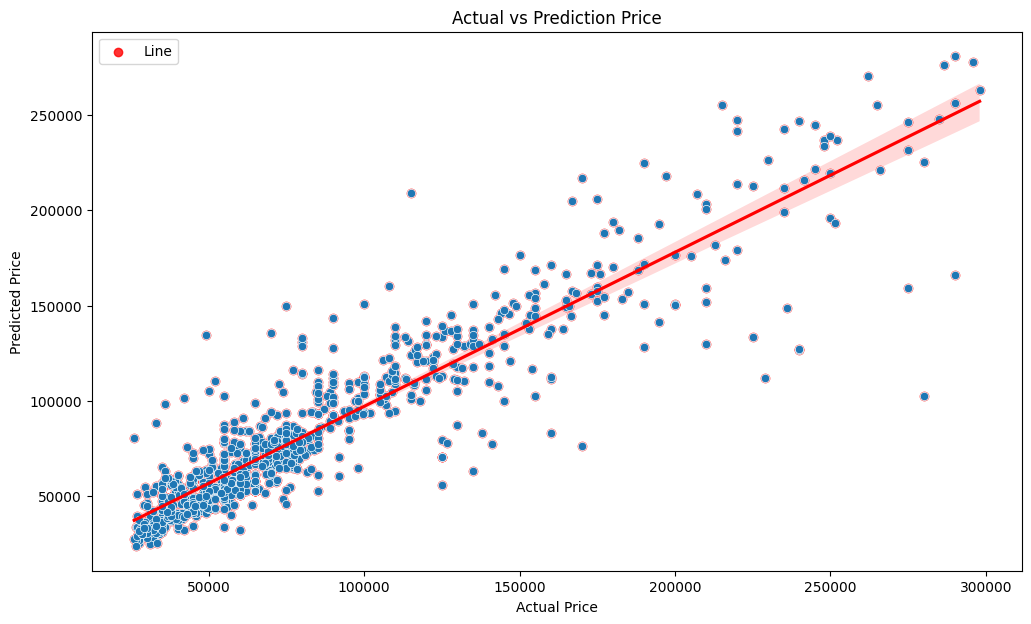

In [57]:
plt.figure(figsize=(12, 7))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning,color='red',label='Line')
sns.scatterplot(x= y_test, y= y_pred_xgb_tuning).set(title='Actual vs Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

Brief explanation of the scatterplot:
 - The dots are blue and represent used cars.
 - The x-axis shows the actual price a car was sold for.
 - The y-axis shows the price the model predicted the car would sell for.
 - The red line shows a perfect match between predicted and actual prices.

Analysis from the graph:
1. The dots are close to the red line, meaning the model did a good job predicting prices for most cars.
2. A few dots are far from the line, meaning the model wasn't as accurate for those cars.


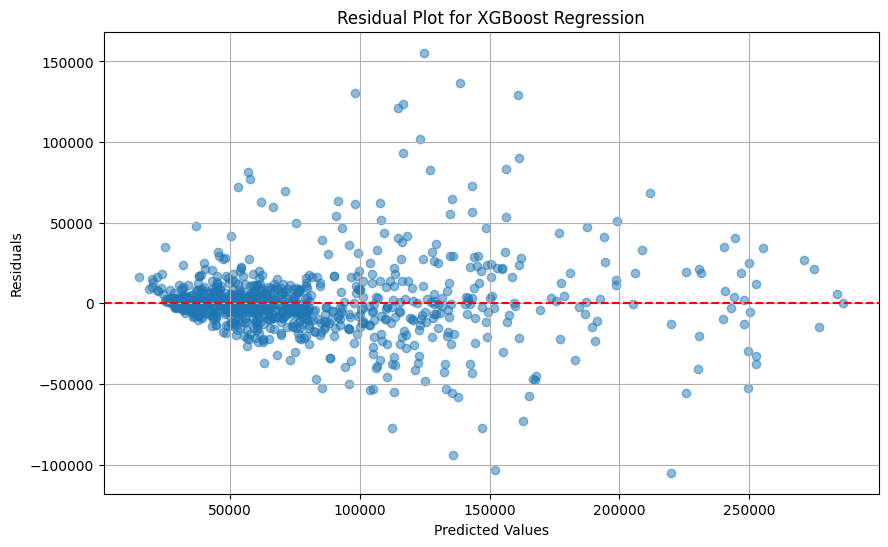

In [58]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot for XGBoost Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.grid(True)
plt.show()

The residual plot suggests that the XGBoost regression model performs well overall. The random spread of errors in the model's predictions suggests it's generally distributed around zero, means there is no major bias. While there are a few outliers that indicates for expensive cars, overall it seems to be working well.

#### Feature Importance

Feature importance is a measure of the relative contribution of each feature (or variable) to the overall performance of a machine learning model. It's a way to understand which features are most relevant or useful in predicting the target variable.

The reasons we need feature importance?

- Model interpretability: Feature importance helps to understand which features are driving the predictions, making it easier to interpret the model's decisions.

- Feature selection: By identifying unimportant features, you can reduce the dimensionality of your dataset, improve model performance, and reduce overfitting.

- Data quality: Feature importance can help identify noisy or irrelevant features that may need to be cleaned or transformed.

Since I used all the features and already do the data cleaning, thus I use feature importance to interpret the model.

In [59]:
# Define best model
model_final = pipeline_xgb

# Create a list features
features = list(preprocessor.get_feature_names_out())
list_features = []
for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))
list_features

# assign feature importance to variable
imp = model_final[-1].feature_importances_
imp

# Convert to percentages
percent_importances = 100 * (imp / imp.sum())

# Create a DataFrame with feature importances
features_imp = pd.DataFrame({
    'Importance': percent_importances,
    'Feature': list_features
}).sort_values(by='Importance', ascending=False)
features_imp

Importance             Feature
20   13.734624              Make_2
25   13.709966         Engine_Size
24    8.365331                Year
21    8.280006              Make_3
22    5.733252              Make_4
23    5.452701              Make_5
7     4.715687              Type_2
4     3.989202   _Options_Standard
2     3.806087       _Origin_Saudi
19    3.375943              Make_1
9     3.333790              Type_4
10    3.313858              Type_5
26    2.562438             Mileage
15    2.285877            Region_2
8     2.171090              Type_3
12    2.114569              Type_7
18    1.914641              Make_0
3     1.776403  _Options_Semi Full
5     1.709778              Type_0
6     1.528993              Type_1
11    1.389947              Type_6
0     1.271103   _Gear_Type_Manual
14    0.922795            Region_1
1     0.768126       _Origin_Other
17    0.673309            Region_4
16    0.596444            Region_3
13    0.504047            Region_0

<Axes: xlabel='Importance', ylabel='Feature'>

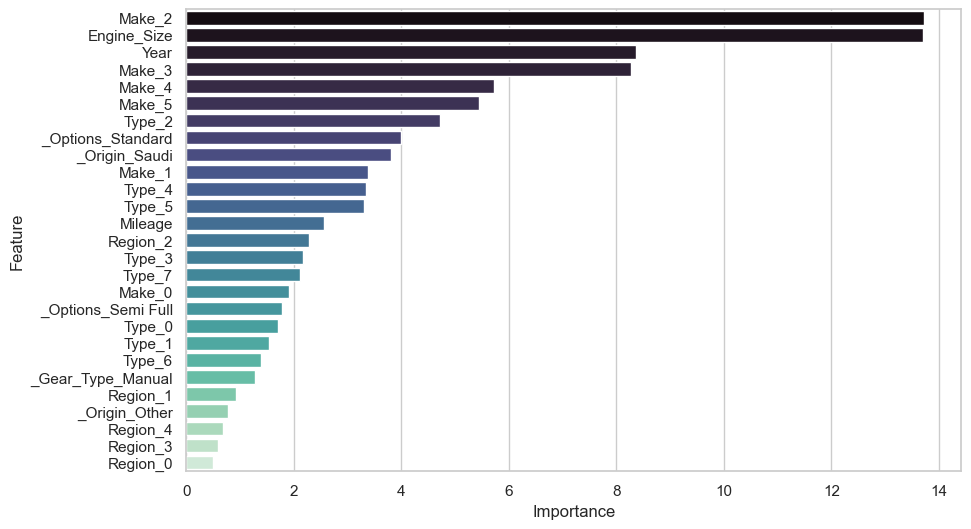

In [60]:
# visualization
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot (data=features_imp, x='Importance',y='Feature',orient='h',palette='mako')

#### Explainable AI

In [61]:
# explainer 
explainer = shap.Explainer(
    model_final[1].predict,
    model_final[0].transform(X_test)
)
shap_values = explainer( model_final[0].transform(X_test))

PermutationExplainer explainer: 836it [00:39, 16.57it/s]                         


In [62]:
# Checking 
i = 1
X_test.iloc[i], y_test.iloc[i]

(Type              Taurus
 Region            Dammam
 Make                Ford
 Gear_Type      Automatic
 Origin             Other
 Options        Semi Full
 Year                2015
 Engine_Size          3.5
 Mileage           103000
 Name: 4361, dtype: object,
 78000)

In [79]:
[i for i in enumerate (list_features)]

[(0, '_Gear_Type_Manual'),
 (1, '_Origin_Other'),
 (2, '_Origin_Saudi'),
 (3, '_Options_Semi Full'),
 (4, '_Options_Standard'),
 (5, 'Type_0'),
 (6, 'Type_1'),
 (7, 'Type_2'),
 (8, 'Type_3'),
 (9, 'Type_4'),
 (10, 'Type_5'),
 (11, 'Type_6'),
 (12, 'Type_7'),
 (13, 'Region_0'),
 (14, 'Region_1'),
 (15, 'Region_2'),
 (16, 'Region_3'),
 (17, 'Region_4'),
 (18, 'Make_0'),
 (19, 'Make_1'),
 (20, 'Make_2'),
 (21, 'Make_3'),
 (22, 'Make_4'),
 (23, 'Make_5'),
 (24, 'Year'),
 (25, 'Engine_Size'),
 (26, 'Mileage')]

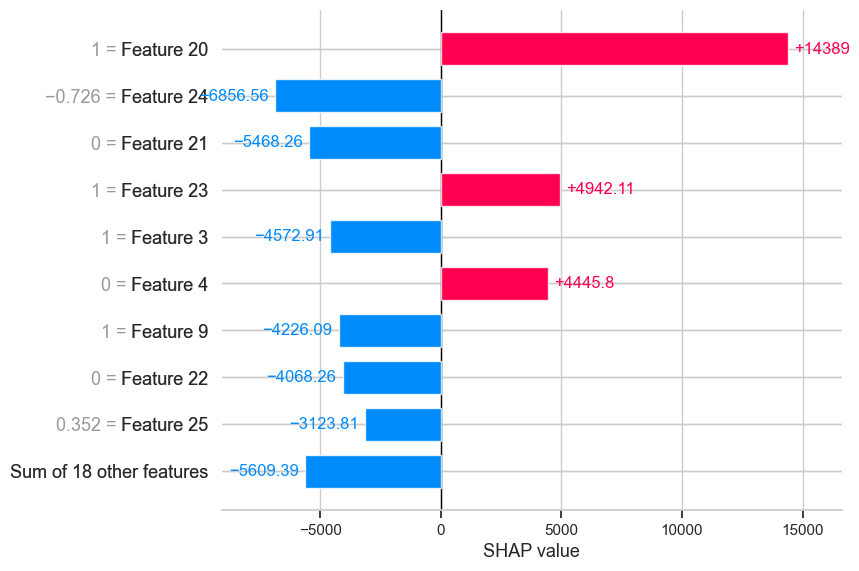

In [63]:
[i for i in enumerate(list_features)]

# shap_values for explain obeservation in test
shap.plots.bar(shap_values[i])

#### SHAP values analysis:
The SHAP (SHapley Additive exPlanations) plot provides insights into the contribution of each feature to the predicted price. The graph highlights the most influential features in predicting the price of a used car.

Interpreation from the SHAP plot with combining each feature importance:
1. Make_2 (Feature 20)

Importance: 13.73%

SHAP Value: +14389

Impact: This feature significantly increases the predicted price by 14389 units when present.


2. Year (Feature 24)

Importance: 8.37%

SHAP Value: -6856.56

Impact: The car's year decreases the predicted price by 6856.56 units in this specific instance.


3. Make_3 (Feature 21)

Importance: 8.28%

SHAP Value: -5468.26

Impact: This feature decreases the predicted price by 5468.26 units in this specific instance.


4.  Make_5 (Feature 23)

Importance: 5.45%

SHAP Value: +4942.11

Impact: This feature increases the predicted price by 4942.11 units in this specific instance.


5. _Options_Semi Full (Feature 3)

Importance: 1.78%

SHAP Value: -4572.91

Impact: This feature decreases the predicted price by 4572.91 units in this specific instance.



6. _Options_Standard (Feature 4)

Importance: 3.99%

SHAP Value: +4445.8

Impact: This feature increases the predicted price by 4445.8 units in this specific instance.


7.  Type_4 (Feature 9)

Importance: 3.33%

SHAP Value: -4226.09

Impact: This feature decreases the predicted price by 4226.09 units in this specific instance.


8. Make_4 (Feature 22)

Importance: 5.73%

SHAP Value: -4068.26

Impact: This feature decreases the predicted price by 4068.26 units in this specific instance.


9. Engine_Size (Feature 25)

Importance: 13.71%

SHAP Value: -3123.81

Impact: This feature decreases the predicted price by 3123.81 units in this specific instance.


10. Sum of 18 Other Features

SHAP Value: -5609.39

Impact: These features collectively decrease the predicted price by 5609.39 units in this specific instance.

 99%|===================| 1928/1947 [00:11<00:00]       

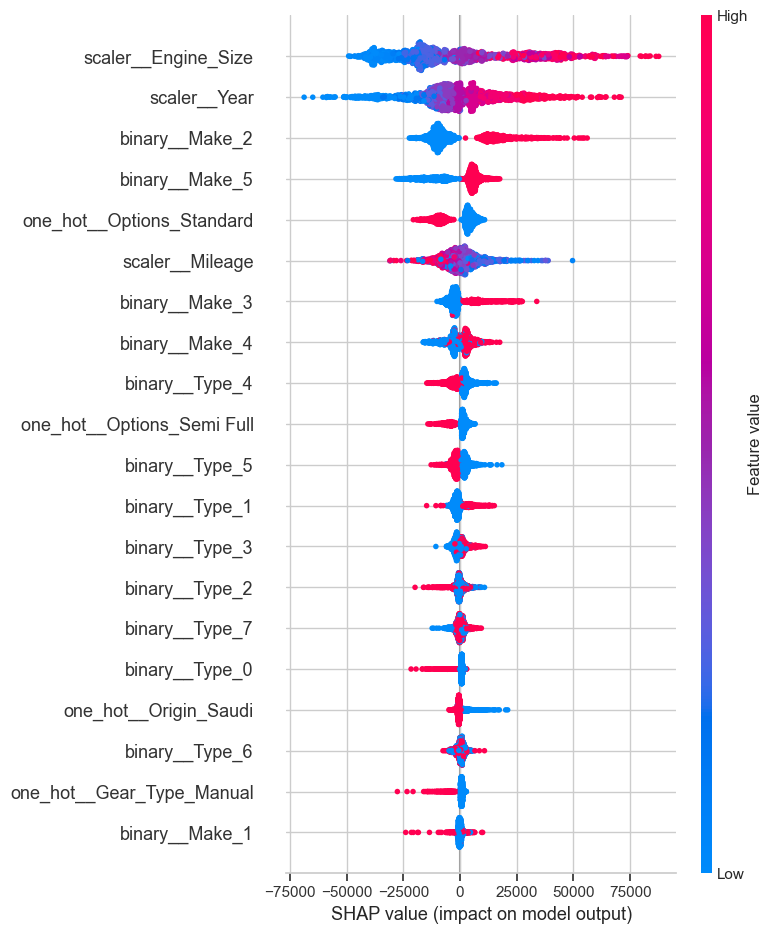

In [76]:
# Transform the training data using the preprocessor
X_train_trans = model_final.named_steps['preprocessing'].transform(X_train)

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(
    model_final.named_steps['model'],
    data=X_train_trans,
    feature_perturbation='interventional'
)

# Compute SHAP values for the training data
shap_values = explainer.shap_values(X_train_trans)

# Optionally, you can visualize the SHAP values
shap.summary_plot(shap_values, X_train_trans, feature_names=model_final.named_steps['preprocessing'].get_feature_names_out())

#### Summary:
 - Positive Contributions: Make_2, Make_5, and _Options_Standard have substantial positive contributions to the predicted price, indicating these features significantly increase the car's price.
- Negative Contributions: Engine_Size, Year, Make_3, Type_4, Make_4, and the sum of 18 other features have negative contributions, indicating these features tend to decrease the car's price in this specific context.


Overall, the plot highlights the importance and impact of various features on the car's price, with Make_2 and Engine_Size being the most influential. Understanding these contributions helps in making better predictions and interpretations of the model's behavior.

#### Model saving

In [66]:
# model_final.fit(X_train, y_train)

# pickle.dump(model_final, open('putri_Model_UsedCars_Saudi_Arabia.sav', 'wb'))

In [88]:
# # Loaded model
filename = 'putri_Model_UsedCars_Saudi_Arabia.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [68]:
df_used_cars.head()

Type          Region        Make  Gear_Type       Origin    Options  \
2  Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic       Full   
3       Optima  Hafar Al-Batin         Kia  Automatic        Saudi  Semi Full   
5          CX3            Abha       Mazda  Automatic        Saudi  Semi Full   
6    Cayenne S          Riyadh     Porsche  Automatic        Saudi       Full   
7       Sonata          Riyadh     Hyundai  Automatic        Saudi       Full   

   Year  Engine_Size  Mileage   Price  
2  2015          5.0   140000  260000  
3  2015          2.4   220000   42000  
5  2019          2.0    25000   58000  
6  2012          4.8   189000   85000  
7  2016          2.4      155   48000

### Predict Car

In [95]:
predict_car = pd.DataFrame({
    'Type':['Camry'],
    'Region':['Al-Medina'], 
    'Make':['Toyota'], 
    'Gear_Type':['Automatic'], 
    'Origin':['Saudi'], 
    'Options':['Full'], 
    'Year':[2016],
    'Engine_Size':[2.5], 
    'Mileage':[222000]
})

loaded_model.predict(predict_car)

array([55601.234], dtype=float32)

In [92]:
df_used_cars[df_used_cars['Make'] == 'Toyota']

Type     Region    Make  Gear_Type       Origin    Options  \
8           Avalon     Riyadh  Toyota  Automatic        Saudi   Standard   
11    Land Cruiser     Riyadh  Toyota  Automatic        Saudi       Full   
13              FJ     Riyadh  Toyota  Automatic        Saudi  Semi Full   
17    Land Cruiser     Riyadh  Toyota  Automatic        Saudi       Full   
31         Corolla      Jazan  Toyota  Automatic        Saudi  Semi Full   
...            ...        ...     ...        ...          ...        ...   
5585       Corolla      Jazan  Toyota  Automatic        Saudi  Semi Full   
5589  Land Cruiser     Tabouk  Toyota  Automatic  Gulf Arabic       Full   
5590         Camry  Al-Medina  Toyota  Automatic        Saudi       Full   
5596         Hilux     Jeddah  Toyota     Manual        Saudi       Full   
5605         Hilux     Najran  Toyota     Manual        Saudi       Full   

      Year  Engine_Size  Mileage   Price  
8     2016          3.5   110864   81500  
11    2011          4.6    79000  145000  
13    2020          4.0    17000  140000  
17    2019          4.6    71000  200000  
31    2013          1.6      296   30000  
...    ...          ...      ...     ...  
5585  2013          1.6   220000   30000  
5589  2013          4.6      186  138000  
5590  2016          2.5   222000   58000  
5596  2016          2.7   175000   77000  
5605  2014          2.7    98000   70000  

[669 rows x 10 columns]

## Conclusion

1. The XGBRegression model become a choosen model for this business case. The Adjusted R² score of 0.846898 on the test set indicates that model is well-fitted to the data and can generalize effectively to unseen data. The Adjusted R² score of 0.817992 on the training set indicates that the model is not overfitting. This means that model can perform well when predicting the price.

2. The minimal difference between train and test scores (0.028906) indicates that the model is stable and performs consistently on both training and new data. This indicates that this model can closely accurate predict the price.

3. SHAP analysis reveals Make_2, Engine_Size, and Year as the most influential features impacting used car prices. Make_2 and Engine_Size significantly increase the predicted price, while Year has a decreasing effect. A closer examination of these features is recommended. 

4. The "Make_number" feature, representing the brand of used cars, dominates the higher chart for influential features impacting price. This is most likely because three features belong to this category.


## Model Limitation

1. This model is currently limited to predicting prices for used cars under SAR 300,000. As a result, accuracy may decrease for cars outside this price range.

2. While Random Search is a time-efficient method for hyperparameter tuning used in this model, it may not achieve the absolute best performance metrics.

3. Using a binary encoder for data conversion can lead to ambiguity in interpreting some feature names, such as Make_1 and Type_4. Consider using a more descriptive encoding method for improved clarity.


## Model Recommendation


1. Consider to improve model accuracy by adding more features like accident history and maintenance records. Additionally, explore interaction terms between existing features, such as the relationship between engine size and mileage, to uncover hidden patterns and refine predictions.

2. Consider expand the price range above 300k. A wider price range with additonal fetures can resulting to another interesting insights that might be usefull for the future company.

3. Consider to perform a more detailed error analysis to identify where the model's predictions are most inaccurate and focus on improving those areas.

4. Continue using SHAP values to interpret the model's predictions and communicate the importance of features to stakeholders.

5. Regularly retrain the model with new data to maintain its effectiveness and guarantee reliable predictions.
